# Creating a Jupyter notebook to analyse student performance

## importing libraries
 numpy to work with arrays ,
 pandas to work with tables or dataframes,
 matplotlib and seaborn to work with charts and visualization

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('student_extended_ml_dataset2.csv',encoding='unicode_escape')
# we used 'unicode_escape' to avoid encoding error


In [26]:
df.shape
# Representing number of rows and columns

(5000, 10)

In [27]:
df
# Representing first 30 rows of the dataframe

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High


In [32]:
df.info()
# Representing summary of information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB


In [33]:
# Drop blank columns
df.drop(['status', 'unnamed1'], axis=1, inplace = True)

KeyError: "['status', 'unnamed1'] not found in axis"

In [30]:
pd.isnull(df)
# We will create a DataFrame of the same shape as your original DataFrame df but with boolean values .In the resulting DataFrame, each element is True if the corresponding element in df is  missing or null and False if the corresponding element in df is not missing.

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


In [23]:
# Checking for null values
pd.isnull(df).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Name    Age  Gender  Hours_Studied     IQ  Physics_Marks  Math_Marks  \
0     False  False   False          False  False          False       False   
1     False  False   False          False  False          False       False   
2     False  False   False          False  False          False       False   
3     False  False   False          False  False          False       False   
4     False  False   False          False  False          False       False   
...     ...    ...     ...            ...    ...            ...         ...   
4995  False  False   False          False  False          False       False   
4996  False  False   False          False  False          False       False   
4997  False  False   False          False  False          False       False   
4998  False  False   False          False  False          False       False   
4999  False  False   False          False  False          False      

So there are no null values 

In [ ]:
# Columns labels in a dataframe
df.columns

In [ ]:
#describe() method returns descriptive of the data
df.describe


df[['Name', 'IQ', 'Hours_Studied', ' Physics_Marks', ' Math_Marks', 'Chemistry_Marks']].describe()

# Exploratory Data Analysis (EDA)

## Gender

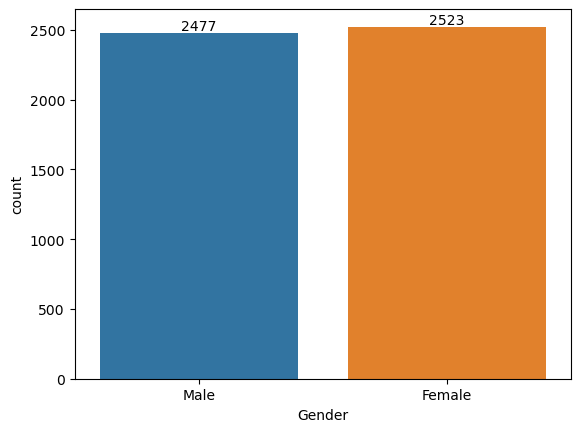

In [9]:
# Creating a countplot bar to count the number of males and females
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)
    

From the above graph , we can see there are 2477 males, and 2523 females

### Age

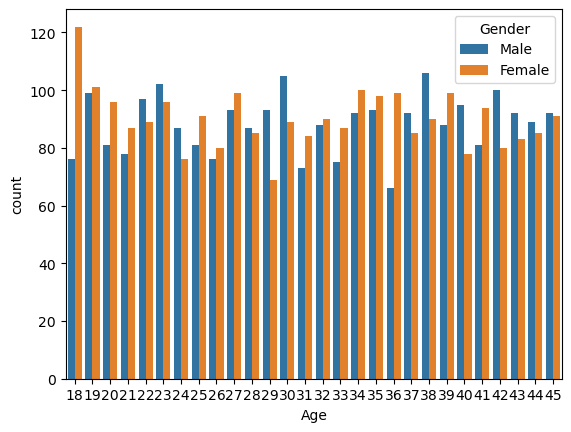

In [10]:
ax = sns.countplot(data = df, x = 'Age', hue = 'Gender')

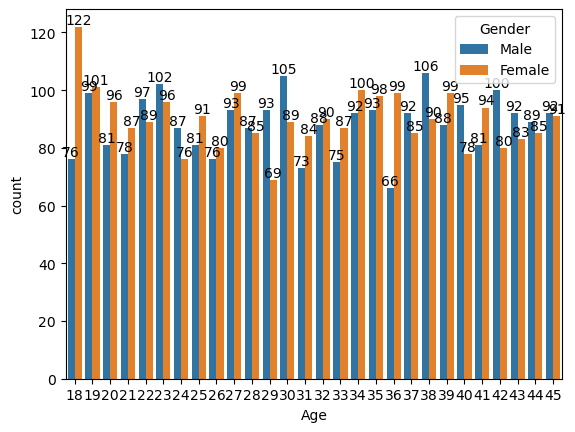

In [11]:
ax = sns.countplot(data = df, x = 'Age', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [12]:
# Getting Average marks of the students
df['Average_Marks'] = df[['Chemistry_Marks','Math_Marks','Physics_Marks']].mean(axis=1).round(2)
df['Average_Marks'] 

0       71.67
1       73.67
2       65.33
3       79.67
4       75.33
        ...  
4995    79.00
4996    79.00
4997    81.00
4998    84.00
4999    65.33
Name: Average_Marks, Length: 5000, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

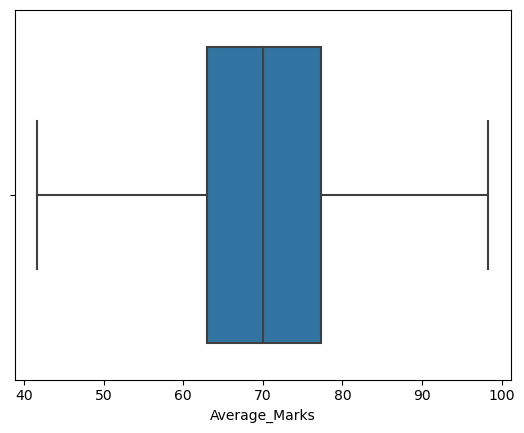

In [13]:
sns.boxplot( x="Average_Marks",data=df)
plt.show

 so there are no outliers 

Study_Hours_Group  High   Low
Gender                       
Female             1379  1144
Male               1384  1093


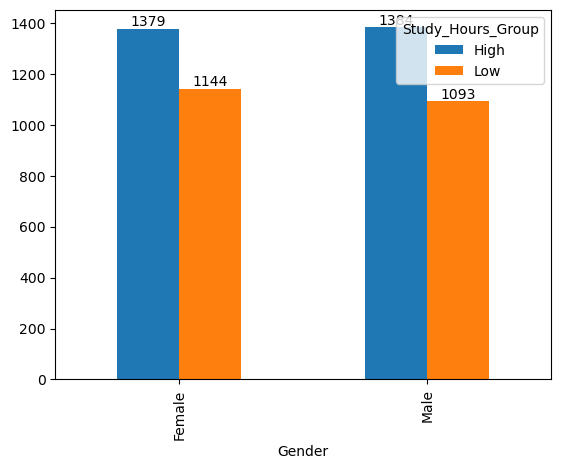

In [14]:
# Creating a Crosstab for Gender and Study_Hours_Group
ct=pd.crosstab(index=df['Gender'],columns=df['Study_Hours_Group'])
print(ct)


ax = ct.plot.bar()
for bars in ax.containers:
    ax.bar_label(bars)
   

So from the above graph we can clearly observe that there is no corelation between Gender and Study_Hours_Group 

In [15]:
# Getting Physics_Marks Gender wise
ct=pd.crosstab(index=df['Gender'],columns=df['Physics_Marks'])
print(ct)


Physics_Marks  40   41   42   43   44   45   46   47   48   49   ...  91   \
Gender                                                           ...        
Female          41   36   42   43   42   43   53   43   38   46  ...   45   
Male            41   34   42   43   43   51   42   42   29   27  ...   41   

Physics_Marks  92   93   94   95   96   97   98   99   100  
Gender                                                      
Female          55   46   53   31   32   49   40   39   42  
Male            45   56   46   38   47   39   41   39   44  

[2 rows x 61 columns]


In [28]:
# Getting Math_Marks Gender wise
ct=pd.crosstab(index=df['Gender'],columns=df['Math_Marks'])
print(ct)


Math_Marks  40   41   42   43   44   45   46   47   48   49   ...  91   92   \
Gender                                                        ...             
Female       31   35   43   38   38   49   45   48   59   42  ...   29   41   
Male         38   33   49   47   42   46   40   46   45   53  ...   53   34   

Math_Marks  93   94   95   96   97   98   99   100  
Gender                                              
Female       42   50   33   40   36   37   38   45  
Male         39   35   39   40   34   34   42   37  

[2 rows x 61 columns]


In [75]:
# Getting Chemistry_Marks Gender wise
ct=pd.crosstab(index=df['Gender'],columns=df['Chemistry_Marks'])
print(ct)


Chemistry_Marks  40   41   42   43   44   45   46   47   48   49   ...  91   \
Gender                                                             ...        
Female            36   42   44   38   39   51   48   39   44   34  ...   49   
Male              45   42   46   37   34   40   45   36   40   43  ...   54   

Chemistry_Marks  92   93   94   95   96   97   98   99   100  
Gender                                                        
Female            43   33   34   40   36   40   43   33   37  
Male              45   34   37   28   37   33   46   42   44  

[2 rows x 61 columns]


                   Math_Marks  Physics_Marks  Chemistry_Marks
Study_Hours_Group                                            
High                69.917843      70.456750        69.871516
Low                 69.690210      70.130979        69.708985


<function matplotlib.pyplot.show(close=None, block=None)>

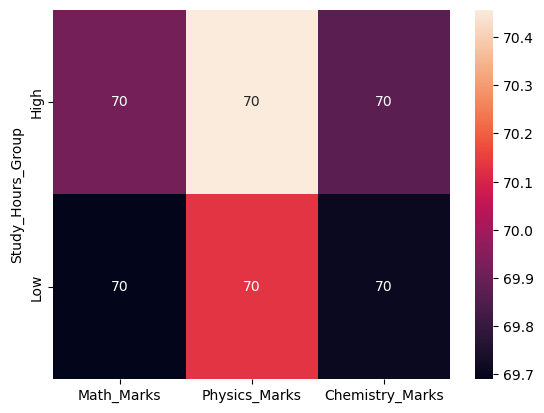

In [29]:
# First we grouped the DataFrame df by the 'Study_Hours_Group' column.
# Then we Compute the mean of the 'Math_Marks,' 'Physics_Marks,' and 'Chemistry_Marks' columns within each group.
# Then we create a heatmap visualization of the aggregated data using Seaborn.


gb1=df.groupby("Study_Hours_Group").agg({"Math_Marks":"mean","Physics_Marks":"mean","Chemistry_Marks":"mean"})
print(gb1)
sns.heatmap(gb1, annot = True)
plt.show

From the above graph, we can observe that gender and study group hours are not correlated with each other, so similarly we can also conclude that the marks and study hours and gender are not correlated either.

In [30]:
#age and IQ are continous features so we need to form groups of age and IQ as machine learning models don't work well with continous features.
df['Age_Band'] = 0
df['IQ_Band'] = 0

In [31]:
#getting quatiles to bin the data 
print(df['Age'].quantile([0.25, 0.5, 0.75]))
print(df['IQ'].quantile([0.25, 0.5, 0.75]))

0.25    24.0
0.50    32.0
0.75    38.0
Name: Age, dtype: float64
0.25     97.0
0.50    115.0
0.75    133.0
Name: IQ, dtype: float64


In [32]:
# Forming Age_Band i.e grouping the age
df.loc[(df['Age']<=24),'Age_Band']=0
df.loc[(df['Age']>24)&(df['Age']<=32),'Age_Band']=1
df.loc[(df['Age']>32)&(df['Age']<=38),'Age_Band']=2
df.loc[(df['Age']>38),'Age_Band']=4
df['Age_Band']

0       0
1       2
2       2
3       2
4       1
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Age_Band, Length: 5000, dtype: int64

In [33]:
# Displaying the counts of Age_Band
df['Age_Band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_Band
1,1383
0,1287
4,1247
2,1083


So we can observe that '1' Age_Band has the maximum number of students that means age group  from 24 to 32 years of age has the maximum number of students

In [34]:
# Forming IQ_Band i.e grouping the IQ
df.loc[(df['IQ']<=97),'IQ_Band']=0
df.loc[(df['IQ']>97)&(df['IQ']<=115),'IQ_Band']=1
df.loc[(df['IQ']>115)&(df['IQ']<=133),'IQ_Band']=2
df.loc[(df['IQ']>133),'IQ_Band']=4
df['IQ_Band']

0       0
1       1
2       2
3       4
4       0
       ..
4995    4
4996    2
4997    1
4998    4
4999    0
Name: IQ_Band, Length: 5000, dtype: int64

In [35]:
# Displaying the counts of IQ_Band
df['IQ_Band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,IQ_Band
0,1298
2,1270
1,1229
4,1203


So we can observe that '0' IQ_Band has the maximum number of students that means IQ less than 97  has the maximum number of students

(array([575., 549., 491., 364., 513., 532., 356., 560., 528., 532.]),
 array([18. , 20.7, 23.4, 26.1, 28.8, 31.5, 34.2, 36.9, 39.6, 42.3, 45. ]),
 <BarContainer object of 10 artists>)

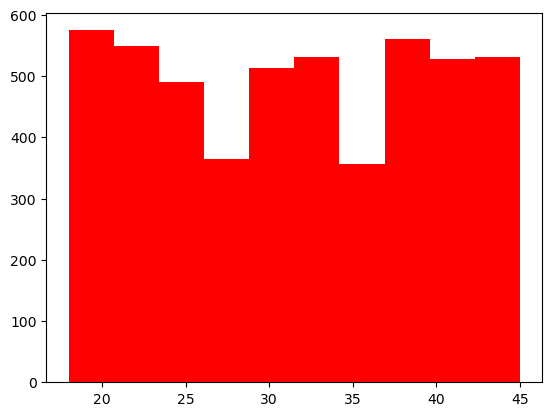

In [84]:
# creating a histogram of the 'Age' column in DataFrame  with 10 bins.
plt.hist(df['Age'], bins=10,color='red')

(array([474., 553., 471., 478., 474., 515., 494., 478., 500., 563.]),
 array([ 80.,  87.,  94., 101., 108., 115., 122., 129., 136., 143., 150.]),
 <BarContainer object of 10 artists>)

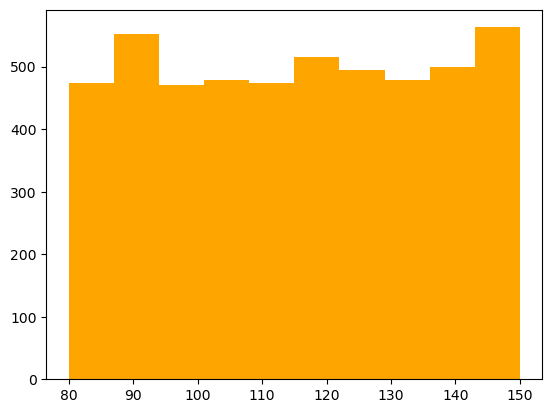

In [83]:
# creating a histogram of the 'IQ' column in DataFrame  with 10 bins.
plt.hist(df['IQ'], bins=10,color='orange')

(array([ 53., 196., 410., 897., 928., 986., 862., 425., 197.,  46.]),
 array([41.67 , 47.336, 53.002, 58.668, 64.334, 70.   , 75.666, 81.332,
        86.998, 92.664, 98.33 ]),
 <BarContainer object of 10 artists>)

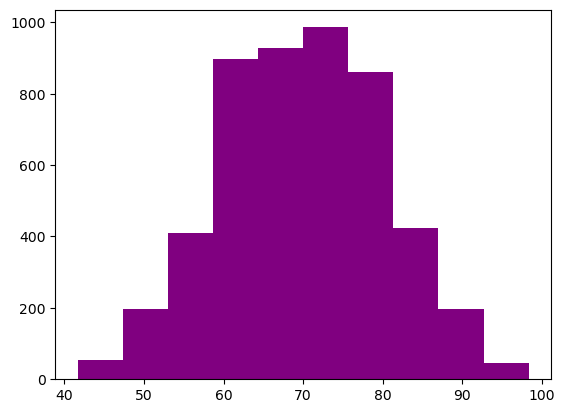

In [85]:
#creating a histogram of the 'Average_Marks' column in DataFrame  with 10 bins.
plt.hist(df['Average_Marks'], bins=10, color='purple')

<function matplotlib.pyplot.show(close=None, block=None)>

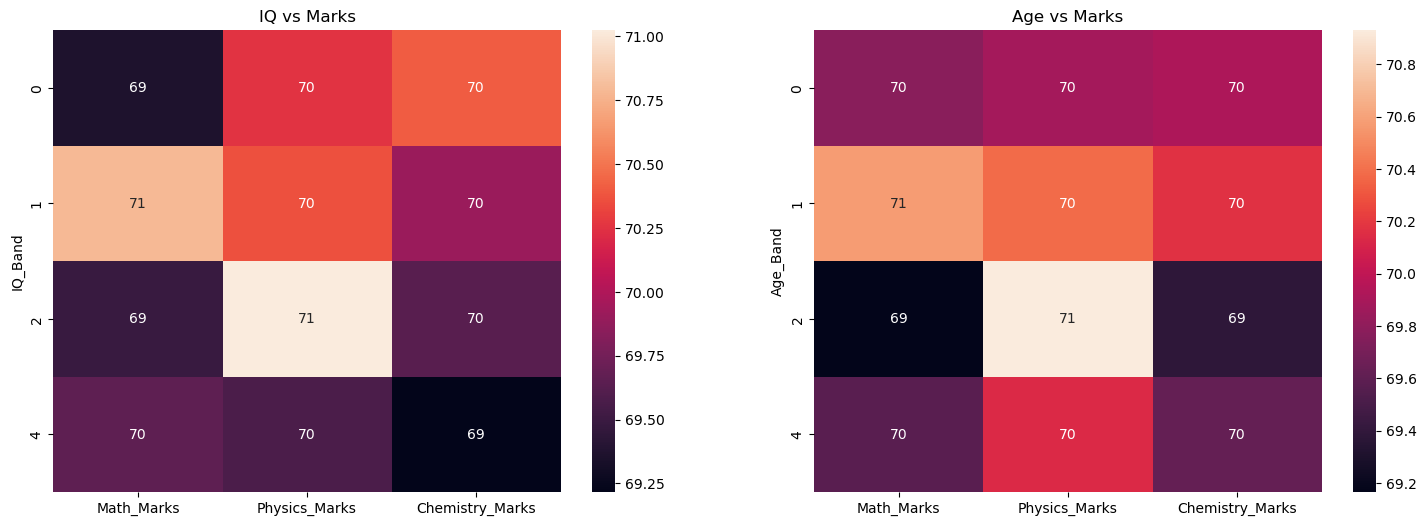

In [39]:
# Now we are creating 2 subplots that are side by side, and both of them are  displaying a heatmap using Seaborn to visualize the mean marks for 'Math_Marks,' 'Physics_Marks,' and 'Chemistry_Marks' based on two different grouping criteria : 'IQ_Band' and 'Age_Band.

gb3=df.groupby("IQ_Band").agg({"Math_Marks":"mean","Physics_Marks":"mean","Chemistry_Marks":"mean"})
gb4=df.groupby("Age_Band").agg({"Math_Marks":"mean","Physics_Marks":"mean","Chemistry_Marks":"mean"})
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.heatmap(gb3,ax = ax[0],annot = True)
ax[0].set_title('IQ vs Marks')
sns.heatmap(gb4,ax = ax[1], annot = True)
ax[1].set_title('Age vs Marks')
plt.show

## Data Preprocessing and feature engineering

In [40]:
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,71.67,0,0
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,73.67,2,1
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,65.33,2,2
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,79.67,2,4
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,75.33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low,79.00,1,4
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low,79.00,2,2
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low,81.00,2,1
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High,84.00,0,4


In [41]:
# Creating a copy of the original dataframe
modelling_data_frame = df.copy()
# Dropping specific columns
modelling_data_frame.drop(['Name','Age','IQ','Average_Marks'], axis=1, inplace=True)
modelling_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,Male,8.140821,87,43,85,True,High,0,0
1,Female,9.825626,86,81,54,False,High,2,1
2,Male,8.835372,87,52,57,True,High,2,2
3,Male,2.482483,70,86,83,False,Low,2,4
4,Female,4.419793,95,48,83,True,Low,1,0
...,...,...,...,...,...,...,...,...,...
4995,Female,3.653474,93,59,85,True,Low,1,4
4996,Female,1.096493,68,70,99,True,Low,2,2
4997,Male,4.156770,76,96,71,False,Low,2,1
4998,Female,6.788548,81,98,73,False,High,0,4


In [42]:
# using the LabelEncoder from Scikit-Learn to encode categorical variables in the modelling_data_frame DataFrame into numerical values. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
modelling_data_frame['Gender'] = le.fit_transform(modelling_data_frame['Gender'])
modelling_data_frame['Study_Hours_Group'] = le.fit_transform(modelling_data_frame['Study_Hours_Group'])
modelling_data_frame['Has_Part_Time_Job'] = le.fit_transform(modelling_data_frame['Has_Part_Time_Job'])
modelling_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,1,8.140821,87,43,85,1,0,0,0
1,0,9.825626,86,81,54,0,0,2,1
2,1,8.835372,87,52,57,1,0,2,2
3,1,2.482483,70,86,83,0,1,2,4
4,0,4.419793,95,48,83,1,1,1,0
...,...,...,...,...,...,...,...,...,...
4995,0,3.653474,93,59,85,1,1,1,4
4996,0,1.096493,68,70,99,1,1,2,2
4997,1,4.156770,76,96,71,0,1,2,1
4998,0,6.788548,81,98,73,0,0,0,4


In [43]:
# Using the Scikit-Learn library to perform  KernelPCA (Principal Component Analysis) on the columns 'Math_Marks,' 'Physics_Marks,' and 'Chemistry_Marks' in the modelling_data_frame DataFrame.
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 1, kernel = 'rbf')
kpca_values = modelling_data_frame[['Math_Marks','Physics_Marks','Chemistry_Marks']].to_numpy()
kpca_values.shape

(5000, 3)

In [44]:
# transforming the data into one dimension
kpca_values = kpca.fit_transform(kpca_values)
kpca_values.shape

(5000, 1)

In [45]:
kpca_values

array([[-0.00129306],
       [-0.00099639],
       [-0.00077624],
       ...,
       [-0.0007046 ],
       [-0.00096759],
       [-0.00091421]])

In [46]:
# Dropping specific columns
modelling_data_frame.drop(['Math_Marks','Physics_Marks','Chemistry_Marks'], axis=1, inplace=True)
modelling_data_frame

,Gender,Hours_Studied,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,1,8.140821,1,0,0,0
1,0,9.825626,0,0,2,1
2,1,8.835372,1,0,2,2
3,1,2.482483,0,1,2,4
4,0,4.419793,1,1,1,0
...,...,...,...,...,...,...
4995,0,3.653474,1,1,1,4
4996,0,1.096493,1,1,2,2
4997,1,4.156770,0,1,2,1
4998,0,6.788548,0,0,0,4


In [47]:
# Study_Hours_Group column from the modelling_data_frame DataFrame is converted into  a NumPy array
y = model
ling_data_frame['Study_Hours_Group'].to_numpy()
y

array([0, 0, 0, ..., 1, 0, 1])

In [48]:
# Dropping specific columns
modelling_data_frame.drop(['Study_Hours_Group'], axis=1, inplace=True)
modelling_data_frame

,Gender,Hours_Studied,Has_Part_Time_Job,Age_Band,IQ_Band
0,1,8.140821,1,0,0
1,0,9.825626,0,2,1
2,1,8.835372,1,2,2
3,1,2.482483,0,2,4
4,0,4.419793,1,1,0
...,...,...,...,...,...
4995,0,3.653474,1,1,4
4996,0,1.096493,1,2,2
4997,1,4.156770,0,2,1
4998,0,6.788548,0,0,4


In [49]:
# We are not  considering gender as we have previously seen that it had no effect on study hours group
X = modelling_data_frame.iloc[:, 1: ].values
X.shape

(5000, 4)

###  Modelling

In [50]:
# Concatenating the NumPy array X with the kpca_values array along the horizontal axis 
X = np.concatenate([X, kpca_values], axis=1)
X

array([[ 8.14082056e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.29306370e-03],
       [ 9.82562647e+00,  0.00000000e+00,  2.00000000e+00,
         1.00000000e+00, -9.96387798e-04],
       [ 8.83537190e+00,  1.00000000e+00,  2.00000000e+00,
         2.00000000e+00, -7.76238405e-04],
       ...,
       [ 4.15676969e+00,  0.00000000e+00,  2.00000000e+00,
         1.00000000e+00, -7.04597528e-04],
       [ 6.78854842e+00,  0.00000000e+00,  0.00000000e+00,
         4.00000000e+00, -9.67589210e-04],
       [ 1.62711148e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00, -9.14214770e-04]])

In [51]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [52]:
# Using Scikit-Learn's train_test_split function to split your feature matrix X and target variable y into training and testing sets. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [53]:
# Using Scikit-Learn's StandardScaler to perform feature scaling on  training and testing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [54]:
#  Using the CatBoostClassifier from the CatBoost library to train a classification model on the preprocessed data and then evaluating its performance.
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

Learning rate set to 0.018621
0:	learn: 0.6444531	total: 114ms	remaining: 1m 54s
1:	learn: 0.5994297	total: 118ms	remaining: 59s
2:	learn: 0.5541030	total: 123ms	remaining: 40.8s
3:	learn: 0.5117289	total: 127ms	remaining: 31.6s
4:	learn: 0.4734685	total: 131ms	remaining: 26.1s
5:	learn: 0.4382532	total: 135ms	remaining: 22.4s
6:	learn: 0.4069933	total: 139ms	remaining: 19.8s
7:	learn: 0.3817292	total: 143ms	remaining: 17.8s
8:	learn: 0.3527574	total: 147ms	remaining: 16.2s
9:	learn: 0.3246008	total: 150ms	remaining: 14.9s
10:	learn: 0.2986413	total: 154ms	remaining: 13.9s
11:	learn: 0.2759942	total: 158ms	remaining: 13s
12:	learn: 0.2558183	total: 161ms	remaining: 12.2s
13:	learn: 0.2363410	total: 163ms	remaining: 11.5s
14:	learn: 0.2224268	total: 167ms	remaining: 11s
15:	learn: 0.2085773	total: 171ms	remaining: 10.5s
16:	learn: 0.1941224	total: 175ms	remaining: 10.1s
17:	learn: 0.1805785	total: 177ms	remaining: 9.68s
18:	learn: 0.1698652	total: 181ms	remaining: 9.37s
19:	learn: 0.157

168:	learn: 0.0019061	total: 784ms	remaining: 3.86s
169:	learn: 0.0018915	total: 789ms	remaining: 3.85s
170:	learn: 0.0018657	total: 793ms	remaining: 3.84s
171:	learn: 0.0018511	total: 797ms	remaining: 3.84s
172:	learn: 0.0018344	total: 802ms	remaining: 3.83s
173:	learn: 0.0018147	total: 806ms	remaining: 3.83s
174:	learn: 0.0017997	total: 810ms	remaining: 3.82s
175:	learn: 0.0017836	total: 814ms	remaining: 3.81s
176:	learn: 0.0017657	total: 818ms	remaining: 3.8s
177:	learn: 0.0017512	total: 822ms	remaining: 3.79s
178:	learn: 0.0017308	total: 825ms	remaining: 3.79s
179:	learn: 0.0017105	total: 829ms	remaining: 3.78s
180:	learn: 0.0017001	total: 833ms	remaining: 3.77s
181:	learn: 0.0016867	total: 837ms	remaining: 3.76s
182:	learn: 0.0016727	total: 841ms	remaining: 3.75s
183:	learn: 0.0016573	total: 845ms	remaining: 3.75s
184:	learn: 0.0016445	total: 849ms	remaining: 3.74s
185:	learn: 0.0016280	total: 852ms	remaining: 3.73s
186:	learn: 0.0016140	total: 856ms	remaining: 3.72s
187:	learn: 0

375:	learn: 0.0007069	total: 1.57s	remaining: 2.62s
376:	learn: 0.0007069	total: 1.58s	remaining: 2.61s
377:	learn: 0.0007069	total: 1.58s	remaining: 2.6s
378:	learn: 0.0007069	total: 1.59s	remaining: 2.6s
379:	learn: 0.0007069	total: 1.59s	remaining: 2.6s
380:	learn: 0.0007069	total: 1.59s	remaining: 2.59s
381:	learn: 0.0007069	total: 1.6s	remaining: 2.58s
382:	learn: 0.0007069	total: 1.6s	remaining: 2.58s
383:	learn: 0.0007037	total: 1.6s	remaining: 2.58s
384:	learn: 0.0007037	total: 1.61s	remaining: 2.57s
385:	learn: 0.0006997	total: 1.61s	remaining: 2.56s
386:	learn: 0.0006997	total: 1.61s	remaining: 2.56s
387:	learn: 0.0006997	total: 1.62s	remaining: 2.55s
388:	learn: 0.0006997	total: 1.62s	remaining: 2.55s
389:	learn: 0.0006997	total: 1.63s	remaining: 2.54s
390:	learn: 0.0006997	total: 1.63s	remaining: 2.54s
391:	learn: 0.0006997	total: 1.63s	remaining: 2.53s
392:	learn: 0.0006997	total: 1.64s	remaining: 2.53s
393:	learn: 0.0006997	total: 1.64s	remaining: 2.52s
394:	learn: 0.0006

548:	learn: 0.0006375	total: 2.18s	remaining: 1.79s
549:	learn: 0.0006375	total: 2.18s	remaining: 1.78s
550:	learn: 0.0006375	total: 2.19s	remaining: 1.78s
551:	learn: 0.0006375	total: 2.19s	remaining: 1.78s
552:	learn: 0.0006375	total: 2.19s	remaining: 1.77s
553:	learn: 0.0006375	total: 2.2s	remaining: 1.77s
554:	learn: 0.0006375	total: 2.2s	remaining: 1.76s
555:	learn: 0.0006375	total: 2.2s	remaining: 1.76s
556:	learn: 0.0006375	total: 2.21s	remaining: 1.75s
557:	learn: 0.0006375	total: 2.21s	remaining: 1.75s
558:	learn: 0.0006375	total: 2.21s	remaining: 1.75s
559:	learn: 0.0006375	total: 2.22s	remaining: 1.74s
560:	learn: 0.0006375	total: 2.22s	remaining: 1.74s
561:	learn: 0.0006375	total: 2.23s	remaining: 1.73s
562:	learn: 0.0006375	total: 2.23s	remaining: 1.73s
563:	learn: 0.0006375	total: 2.23s	remaining: 1.73s
564:	learn: 0.0006375	total: 2.24s	remaining: 1.72s
565:	learn: 0.0006375	total: 2.24s	remaining: 1.72s
566:	learn: 0.0006375	total: 2.24s	remaining: 1.71s
567:	learn: 0.0

723:	learn: 0.0006371	total: 2.78s	remaining: 1.06s
724:	learn: 0.0006371	total: 2.78s	remaining: 1.05s
725:	learn: 0.0006371	total: 2.79s	remaining: 1.05s
726:	learn: 0.0006371	total: 2.79s	remaining: 1.05s
727:	learn: 0.0006371	total: 2.79s	remaining: 1.04s
728:	learn: 0.0006371	total: 2.8s	remaining: 1.04s
729:	learn: 0.0006371	total: 2.8s	remaining: 1.04s
730:	learn: 0.0006371	total: 2.8s	remaining: 1.03s
731:	learn: 0.0006371	total: 2.81s	remaining: 1.03s
732:	learn: 0.0006371	total: 2.81s	remaining: 1.02s
733:	learn: 0.0006371	total: 2.81s	remaining: 1.02s
734:	learn: 0.0006371	total: 2.82s	remaining: 1.02s
735:	learn: 0.0006371	total: 2.82s	remaining: 1.01s
736:	learn: 0.0006370	total: 2.83s	remaining: 1.01s
737:	learn: 0.0006371	total: 2.83s	remaining: 1s
738:	learn: 0.0006370	total: 2.83s	remaining: 1s
739:	learn: 0.0006370	total: 2.84s	remaining: 996ms
740:	learn: 0.0006370	total: 2.84s	remaining: 992ms
741:	learn: 0.0006370	total: 2.84s	remaining: 989ms
742:	learn: 0.0006370

894:	learn: 0.0006365	total: 3.37s	remaining: 395ms
895:	learn: 0.0006365	total: 3.37s	remaining: 392ms
896:	learn: 0.0006365	total: 3.38s	remaining: 388ms
897:	learn: 0.0006365	total: 3.38s	remaining: 384ms
898:	learn: 0.0006365	total: 3.38s	remaining: 380ms
899:	learn: 0.0006365	total: 3.39s	remaining: 376ms
900:	learn: 0.0006365	total: 3.39s	remaining: 373ms
901:	learn: 0.0006365	total: 3.39s	remaining: 369ms
902:	learn: 0.0006365	total: 3.4s	remaining: 365ms
903:	learn: 0.0006365	total: 3.4s	remaining: 361ms
904:	learn: 0.0006365	total: 3.4s	remaining: 357ms
905:	learn: 0.0006365	total: 3.41s	remaining: 354ms
906:	learn: 0.0006365	total: 3.41s	remaining: 350ms
907:	learn: 0.0006365	total: 3.42s	remaining: 346ms
908:	learn: 0.0006365	total: 3.42s	remaining: 342ms
909:	learn: 0.0006365	total: 3.42s	remaining: 338ms
910:	learn: 0.0006365	total: 3.42s	remaining: 335ms
911:	learn: 0.0006365	total: 3.43s	remaining: 331ms
912:	learn: 0.0006365	total: 3.43s	remaining: 327ms
913:	learn: 0.0

1.0

In [55]:
print(cm)

[[553   0]
 [  0 447]]


In [56]:
#  Performing k-fold cross-validation on the CatBoostClassifier model. 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

Learning rate set to 0.017802
0:	learn: 0.6473733	total: 4.35ms	remaining: 4.35s
1:	learn: 0.6032483	total: 8.21ms	remaining: 4.09s
2:	learn: 0.5601490	total: 11.9ms	remaining: 3.96s
3:	learn: 0.5198175	total: 15.7ms	remaining: 3.9s
4:	learn: 0.4831932	total: 19.4ms	remaining: 3.87s
5:	learn: 0.4492527	total: 23ms	remaining: 3.81s
6:	learn: 0.4190686	total: 26.6ms	remaining: 3.77s
7:	learn: 0.3944944	total: 30.4ms	remaining: 3.77s
8:	learn: 0.3663294	total: 34ms	remaining: 3.74s
9:	learn: 0.3387943	total: 37.2ms	remaining: 3.68s
10:	learn: 0.3132100	total: 41ms	remaining: 3.69s
11:	learn: 0.2907180	total: 44.8ms	remaining: 3.69s
12:	learn: 0.2704762	total: 47.4ms	remaining: 3.6s
13:	learn: 0.2508446	total: 49.8ms	remaining: 3.5s
14:	learn: 0.2368159	total: 53.6ms	remaining: 3.52s
15:	learn: 0.2227760	total: 57.4ms	remaining: 3.53s
16:	learn: 0.2081187	total: 61.2ms	remaining: 3.54s
17:	learn: 0.1942556	total: 63.8ms	remaining: 3.48s
18:	learn: 0.1832438	total: 67.2ms	remaining: 3.47s
1

195:	learn: 0.0017180	total: 749ms	remaining: 3.07s
196:	learn: 0.0017041	total: 753ms	remaining: 3.07s
197:	learn: 0.0016896	total: 757ms	remaining: 3.06s
198:	learn: 0.0016741	total: 761ms	remaining: 3.06s
199:	learn: 0.0016604	total: 765ms	remaining: 3.06s
200:	learn: 0.0016461	total: 769ms	remaining: 3.06s
201:	learn: 0.0016323	total: 773ms	remaining: 3.05s
202:	learn: 0.0016179	total: 777ms	remaining: 3.05s
203:	learn: 0.0016042	total: 780ms	remaining: 3.04s
204:	learn: 0.0015903	total: 784ms	remaining: 3.04s
205:	learn: 0.0015789	total: 788ms	remaining: 3.04s
206:	learn: 0.0015663	total: 792ms	remaining: 3.03s
207:	learn: 0.0015533	total: 796ms	remaining: 3.03s
208:	learn: 0.0015412	total: 799ms	remaining: 3.02s
209:	learn: 0.0015304	total: 803ms	remaining: 3.02s
210:	learn: 0.0015198	total: 807ms	remaining: 3.02s
211:	learn: 0.0015102	total: 811ms	remaining: 3.01s
212:	learn: 0.0014980	total: 815ms	remaining: 3.01s
213:	learn: 0.0014859	total: 818ms	remaining: 3s
214:	learn: 0.0

375:	learn: 0.0007756	total: 1.35s	remaining: 2.25s
376:	learn: 0.0007756	total: 1.36s	remaining: 2.24s
377:	learn: 0.0007756	total: 1.36s	remaining: 2.24s
378:	learn: 0.0007756	total: 1.36s	remaining: 2.23s
379:	learn: 0.0007711	total: 1.37s	remaining: 2.23s
380:	learn: 0.0007676	total: 1.37s	remaining: 2.23s
381:	learn: 0.0007675	total: 1.37s	remaining: 2.22s
382:	learn: 0.0007675	total: 1.38s	remaining: 2.21s
383:	learn: 0.0007642	total: 1.38s	remaining: 2.21s
384:	learn: 0.0007642	total: 1.38s	remaining: 2.21s
385:	learn: 0.0007642	total: 1.38s	remaining: 2.2s
386:	learn: 0.0007605	total: 1.39s	remaining: 2.19s
387:	learn: 0.0007579	total: 1.39s	remaining: 2.19s
388:	learn: 0.0007579	total: 1.39s	remaining: 2.19s
389:	learn: 0.0007579	total: 1.39s	remaining: 2.18s
390:	learn: 0.0007579	total: 1.4s	remaining: 2.17s
391:	learn: 0.0007579	total: 1.4s	remaining: 2.17s
392:	learn: 0.0007538	total: 1.4s	remaining: 2.16s
393:	learn: 0.0007537	total: 1.4s	remaining: 2.16s
394:	learn: 0.000

611:	learn: 0.0006653	total: 1.95s	remaining: 1.24s
612:	learn: 0.0006653	total: 1.95s	remaining: 1.23s
613:	learn: 0.0006653	total: 1.95s	remaining: 1.23s
614:	learn: 0.0006653	total: 1.96s	remaining: 1.23s
615:	learn: 0.0006653	total: 1.96s	remaining: 1.22s
616:	learn: 0.0006653	total: 1.96s	remaining: 1.22s
617:	learn: 0.0006653	total: 1.96s	remaining: 1.21s
618:	learn: 0.0006653	total: 1.97s	remaining: 1.21s
619:	learn: 0.0006653	total: 1.97s	remaining: 1.21s
620:	learn: 0.0006652	total: 1.97s	remaining: 1.2s
621:	learn: 0.0006652	total: 1.97s	remaining: 1.2s
622:	learn: 0.0006652	total: 1.98s	remaining: 1.2s
623:	learn: 0.0006652	total: 1.98s	remaining: 1.19s
624:	learn: 0.0006652	total: 1.98s	remaining: 1.19s
625:	learn: 0.0006652	total: 1.98s	remaining: 1.19s
626:	learn: 0.0006652	total: 1.99s	remaining: 1.18s
627:	learn: 0.0006652	total: 1.99s	remaining: 1.18s
628:	learn: 0.0006652	total: 1.99s	remaining: 1.17s
629:	learn: 0.0006652	total: 1.99s	remaining: 1.17s
630:	learn: 0.0

775:	learn: 0.0006649	total: 2.34s	remaining: 675ms
776:	learn: 0.0006649	total: 2.34s	remaining: 672ms
777:	learn: 0.0006649	total: 2.34s	remaining: 669ms
778:	learn: 0.0006648	total: 2.35s	remaining: 666ms
779:	learn: 0.0006649	total: 2.35s	remaining: 663ms
780:	learn: 0.0006648	total: 2.35s	remaining: 660ms
781:	learn: 0.0006648	total: 2.35s	remaining: 656ms
782:	learn: 0.0006648	total: 2.36s	remaining: 653ms
783:	learn: 0.0006648	total: 2.36s	remaining: 650ms
784:	learn: 0.0006648	total: 2.36s	remaining: 647ms
785:	learn: 0.0006648	total: 2.36s	remaining: 644ms
786:	learn: 0.0006648	total: 2.37s	remaining: 641ms
787:	learn: 0.0006648	total: 2.37s	remaining: 637ms
788:	learn: 0.0006648	total: 2.37s	remaining: 634ms
789:	learn: 0.0006648	total: 2.37s	remaining: 631ms
790:	learn: 0.0006648	total: 2.38s	remaining: 628ms
791:	learn: 0.0006648	total: 2.38s	remaining: 625ms
792:	learn: 0.0006648	total: 2.38s	remaining: 622ms
793:	learn: 0.0006648	total: 2.38s	remaining: 618ms
794:	learn: 

942:	learn: 0.0006643	total: 2.74s	remaining: 165ms
943:	learn: 0.0006643	total: 2.74s	remaining: 163ms
944:	learn: 0.0006643	total: 2.74s	remaining: 160ms
945:	learn: 0.0006643	total: 2.75s	remaining: 157ms
946:	learn: 0.0006643	total: 2.75s	remaining: 154ms
947:	learn: 0.0006643	total: 2.75s	remaining: 151ms
948:	learn: 0.0006643	total: 2.75s	remaining: 148ms
949:	learn: 0.0006643	total: 2.76s	remaining: 145ms
950:	learn: 0.0006643	total: 2.76s	remaining: 142ms
951:	learn: 0.0006643	total: 2.76s	remaining: 139ms
952:	learn: 0.0006643	total: 2.76s	remaining: 136ms
953:	learn: 0.0006643	total: 2.77s	remaining: 133ms
954:	learn: 0.0006643	total: 2.77s	remaining: 130ms
955:	learn: 0.0006643	total: 2.77s	remaining: 128ms
956:	learn: 0.0006643	total: 2.77s	remaining: 125ms
957:	learn: 0.0006643	total: 2.77s	remaining: 122ms
958:	learn: 0.0006643	total: 2.78s	remaining: 119ms
959:	learn: 0.0006643	total: 2.78s	remaining: 116ms
960:	learn: 0.0006643	total: 2.78s	remaining: 113ms
961:	learn: 

138:	learn: 0.0027473	total: 390ms	remaining: 2.41s
139:	learn: 0.0027136	total: 393ms	remaining: 2.41s
140:	learn: 0.0026759	total: 396ms	remaining: 2.41s
141:	learn: 0.0026307	total: 398ms	remaining: 2.41s
142:	learn: 0.0025840	total: 401ms	remaining: 2.4s
143:	learn: 0.0025532	total: 404ms	remaining: 2.4s
144:	learn: 0.0025204	total: 407ms	remaining: 2.4s
145:	learn: 0.0024752	total: 410ms	remaining: 2.4s
146:	learn: 0.0024470	total: 413ms	remaining: 2.39s
147:	learn: 0.0024167	total: 414ms	remaining: 2.38s
148:	learn: 0.0023914	total: 417ms	remaining: 2.38s
149:	learn: 0.0023663	total: 420ms	remaining: 2.38s
150:	learn: 0.0023363	total: 423ms	remaining: 2.38s
151:	learn: 0.0023103	total: 425ms	remaining: 2.37s
152:	learn: 0.0022687	total: 428ms	remaining: 2.37s
153:	learn: 0.0022439	total: 431ms	remaining: 2.37s
154:	learn: 0.0022231	total: 433ms	remaining: 2.36s
155:	learn: 0.0021871	total: 436ms	remaining: 2.36s
156:	learn: 0.0021648	total: 439ms	remaining: 2.36s
157:	learn: 0.00

360:	learn: 0.0007039	total: 984ms	remaining: 1.74s
361:	learn: 0.0007039	total: 987ms	remaining: 1.74s
362:	learn: 0.0007007	total: 990ms	remaining: 1.74s
363:	learn: 0.0007007	total: 993ms	remaining: 1.73s
364:	learn: 0.0007007	total: 995ms	remaining: 1.73s
365:	learn: 0.0007007	total: 998ms	remaining: 1.73s
366:	learn: 0.0007006	total: 1s	remaining: 1.73s
367:	learn: 0.0007006	total: 1s	remaining: 1.72s
368:	learn: 0.0007006	total: 1s	remaining: 1.72s
369:	learn: 0.0006962	total: 1.01s	remaining: 1.72s
370:	learn: 0.0006962	total: 1.01s	remaining: 1.71s
371:	learn: 0.0006931	total: 1.01s	remaining: 1.71s
372:	learn: 0.0006931	total: 1.01s	remaining: 1.71s
373:	learn: 0.0006931	total: 1.02s	remaining: 1.7s
374:	learn: 0.0006931	total: 1.02s	remaining: 1.7s
375:	learn: 0.0006931	total: 1.02s	remaining: 1.7s
376:	learn: 0.0006931	total: 1.02s	remaining: 1.69s
377:	learn: 0.0006916	total: 1.03s	remaining: 1.69s
378:	learn: 0.0006917	total: 1.03s	remaining: 1.69s
379:	learn: 0.0006916	to

523:	learn: 0.0006698	total: 1.38s	remaining: 1.25s
524:	learn: 0.0006698	total: 1.39s	remaining: 1.25s
525:	learn: 0.0006698	total: 1.39s	remaining: 1.25s
526:	learn: 0.0006698	total: 1.39s	remaining: 1.25s
527:	learn: 0.0006698	total: 1.39s	remaining: 1.25s
528:	learn: 0.0006698	total: 1.4s	remaining: 1.24s
529:	learn: 0.0006698	total: 1.4s	remaining: 1.24s
530:	learn: 0.0006698	total: 1.4s	remaining: 1.24s
531:	learn: 0.0006698	total: 1.4s	remaining: 1.23s
532:	learn: 0.0006698	total: 1.41s	remaining: 1.23s
533:	learn: 0.0006698	total: 1.41s	remaining: 1.23s
534:	learn: 0.0006698	total: 1.41s	remaining: 1.23s
535:	learn: 0.0006698	total: 1.41s	remaining: 1.22s
536:	learn: 0.0006698	total: 1.42s	remaining: 1.22s
537:	learn: 0.0006698	total: 1.42s	remaining: 1.22s
538:	learn: 0.0006698	total: 1.42s	remaining: 1.22s
539:	learn: 0.0006698	total: 1.42s	remaining: 1.21s
540:	learn: 0.0006698	total: 1.43s	remaining: 1.21s
541:	learn: 0.0006697	total: 1.43s	remaining: 1.21s
542:	learn: 0.00

757:	learn: 0.0006690	total: 1.96s	remaining: 625ms
758:	learn: 0.0006690	total: 1.96s	remaining: 623ms
759:	learn: 0.0006690	total: 1.96s	remaining: 620ms
760:	learn: 0.0006690	total: 1.97s	remaining: 618ms
761:	learn: 0.0006690	total: 1.97s	remaining: 615ms
762:	learn: 0.0006690	total: 1.97s	remaining: 613ms
763:	learn: 0.0006690	total: 1.98s	remaining: 610ms
764:	learn: 0.0006690	total: 1.98s	remaining: 607ms
765:	learn: 0.0006690	total: 1.98s	remaining: 605ms
766:	learn: 0.0006690	total: 1.98s	remaining: 602ms
767:	learn: 0.0006690	total: 1.98s	remaining: 600ms
768:	learn: 0.0006690	total: 1.99s	remaining: 597ms
769:	learn: 0.0006690	total: 1.99s	remaining: 594ms
770:	learn: 0.0006690	total: 1.99s	remaining: 592ms
771:	learn: 0.0006690	total: 1.99s	remaining: 589ms
772:	learn: 0.0006690	total: 2s	remaining: 586ms
773:	learn: 0.0006690	total: 2s	remaining: 584ms
774:	learn: 0.0006690	total: 2s	remaining: 581ms
775:	learn: 0.0006690	total: 2s	remaining: 578ms
776:	learn: 0.0006690	to

920:	learn: 0.0006687	total: 2.35s	remaining: 202ms
921:	learn: 0.0006687	total: 2.36s	remaining: 199ms
922:	learn: 0.0006687	total: 2.36s	remaining: 197ms
923:	learn: 0.0006687	total: 2.36s	remaining: 194ms
924:	learn: 0.0006687	total: 2.37s	remaining: 192ms
925:	learn: 0.0006687	total: 2.37s	remaining: 189ms
926:	learn: 0.0006687	total: 2.37s	remaining: 187ms
927:	learn: 0.0006687	total: 2.37s	remaining: 184ms
928:	learn: 0.0006687	total: 2.38s	remaining: 182ms
929:	learn: 0.0006687	total: 2.38s	remaining: 179ms
930:	learn: 0.0006687	total: 2.38s	remaining: 176ms
931:	learn: 0.0006687	total: 2.38s	remaining: 174ms
932:	learn: 0.0006687	total: 2.38s	remaining: 171ms
933:	learn: 0.0006686	total: 2.39s	remaining: 169ms
934:	learn: 0.0006686	total: 2.39s	remaining: 166ms
935:	learn: 0.0006686	total: 2.39s	remaining: 164ms
936:	learn: 0.0006686	total: 2.4s	remaining: 161ms
937:	learn: 0.0006686	total: 2.4s	remaining: 158ms
938:	learn: 0.0006686	total: 2.4s	remaining: 156ms
939:	learn: 0.0

123:	learn: 0.0036463	total: 332ms	remaining: 2.35s
124:	learn: 0.0035825	total: 335ms	remaining: 2.35s
125:	learn: 0.0035340	total: 338ms	remaining: 2.34s
126:	learn: 0.0034832	total: 341ms	remaining: 2.34s
127:	learn: 0.0034211	total: 344ms	remaining: 2.34s
128:	learn: 0.0033755	total: 347ms	remaining: 2.34s
129:	learn: 0.0033200	total: 349ms	remaining: 2.34s
130:	learn: 0.0032716	total: 352ms	remaining: 2.33s
131:	learn: 0.0032142	total: 355ms	remaining: 2.33s
132:	learn: 0.0031710	total: 357ms	remaining: 2.33s
133:	learn: 0.0031382	total: 359ms	remaining: 2.32s
134:	learn: 0.0030998	total: 362ms	remaining: 2.32s
135:	learn: 0.0030586	total: 365ms	remaining: 2.32s
136:	learn: 0.0030225	total: 367ms	remaining: 2.31s
137:	learn: 0.0029894	total: 370ms	remaining: 2.31s
138:	learn: 0.0029570	total: 373ms	remaining: 2.31s
139:	learn: 0.0029219	total: 375ms	remaining: 2.31s
140:	learn: 0.0028851	total: 378ms	remaining: 2.3s
141:	learn: 0.0028478	total: 381ms	remaining: 2.3s
142:	learn: 0.

344:	learn: 0.0007815	total: 929ms	remaining: 1.76s
345:	learn: 0.0007779	total: 932ms	remaining: 1.76s
346:	learn: 0.0007779	total: 935ms	remaining: 1.76s
347:	learn: 0.0007779	total: 938ms	remaining: 1.76s
348:	learn: 0.0007740	total: 941ms	remaining: 1.75s
349:	learn: 0.0007740	total: 943ms	remaining: 1.75s
350:	learn: 0.0007740	total: 946ms	remaining: 1.75s
351:	learn: 0.0007740	total: 948ms	remaining: 1.75s
352:	learn: 0.0007740	total: 950ms	remaining: 1.74s
353:	learn: 0.0007740	total: 953ms	remaining: 1.74s
354:	learn: 0.0007701	total: 955ms	remaining: 1.74s
355:	learn: 0.0007668	total: 958ms	remaining: 1.73s
356:	learn: 0.0007619	total: 961ms	remaining: 1.73s
357:	learn: 0.0007564	total: 964ms	remaining: 1.73s
358:	learn: 0.0007564	total: 966ms	remaining: 1.72s
359:	learn: 0.0007564	total: 968ms	remaining: 1.72s
360:	learn: 0.0007529	total: 971ms	remaining: 1.72s
361:	learn: 0.0007529	total: 973ms	remaining: 1.72s
362:	learn: 0.0007495	total: 976ms	remaining: 1.71s
363:	learn: 

505:	learn: 0.0006339	total: 1.33s	remaining: 1.3s
506:	learn: 0.0006339	total: 1.33s	remaining: 1.29s
507:	learn: 0.0006339	total: 1.33s	remaining: 1.29s
508:	learn: 0.0006338	total: 1.34s	remaining: 1.29s
509:	learn: 0.0006338	total: 1.34s	remaining: 1.29s
510:	learn: 0.0006338	total: 1.34s	remaining: 1.28s
511:	learn: 0.0006338	total: 1.35s	remaining: 1.28s
512:	learn: 0.0006338	total: 1.35s	remaining: 1.28s
513:	learn: 0.0006338	total: 1.35s	remaining: 1.28s
514:	learn: 0.0006338	total: 1.35s	remaining: 1.27s
515:	learn: 0.0006338	total: 1.36s	remaining: 1.27s
516:	learn: 0.0006338	total: 1.36s	remaining: 1.27s
517:	learn: 0.0006338	total: 1.36s	remaining: 1.27s
518:	learn: 0.0006338	total: 1.36s	remaining: 1.26s
519:	learn: 0.0006338	total: 1.37s	remaining: 1.26s
520:	learn: 0.0006338	total: 1.37s	remaining: 1.26s
521:	learn: 0.0006338	total: 1.37s	remaining: 1.25s
522:	learn: 0.0006338	total: 1.37s	remaining: 1.25s
523:	learn: 0.0006338	total: 1.38s	remaining: 1.25s
524:	learn: 0

670:	learn: 0.0006331	total: 1.73s	remaining: 846ms
671:	learn: 0.0006331	total: 1.73s	remaining: 843ms
672:	learn: 0.0006331	total: 1.73s	remaining: 841ms
673:	learn: 0.0006331	total: 1.73s	remaining: 838ms
674:	learn: 0.0006331	total: 1.74s	remaining: 836ms
675:	learn: 0.0006331	total: 1.74s	remaining: 833ms
676:	learn: 0.0006331	total: 1.74s	remaining: 830ms
677:	learn: 0.0006331	total: 1.74s	remaining: 828ms
678:	learn: 0.0006331	total: 1.74s	remaining: 825ms
679:	learn: 0.0006331	total: 1.75s	remaining: 822ms
680:	learn: 0.0006331	total: 1.75s	remaining: 820ms
681:	learn: 0.0006331	total: 1.75s	remaining: 817ms
682:	learn: 0.0006331	total: 1.75s	remaining: 814ms
683:	learn: 0.0006331	total: 1.76s	remaining: 812ms
684:	learn: 0.0006331	total: 1.76s	remaining: 809ms
685:	learn: 0.0006331	total: 1.76s	remaining: 806ms
686:	learn: 0.0006331	total: 1.76s	remaining: 804ms
687:	learn: 0.0006331	total: 1.76s	remaining: 801ms
688:	learn: 0.0006331	total: 1.77s	remaining: 798ms
689:	learn: 

907:	learn: 0.0006324	total: 2.31s	remaining: 234ms
908:	learn: 0.0006325	total: 2.31s	remaining: 232ms
909:	learn: 0.0006324	total: 2.32s	remaining: 229ms
910:	learn: 0.0006324	total: 2.32s	remaining: 227ms
911:	learn: 0.0006324	total: 2.32s	remaining: 224ms
912:	learn: 0.0006324	total: 2.33s	remaining: 222ms
913:	learn: 0.0006324	total: 2.33s	remaining: 219ms
914:	learn: 0.0006324	total: 2.33s	remaining: 217ms
915:	learn: 0.0006324	total: 2.33s	remaining: 214ms
916:	learn: 0.0006324	total: 2.33s	remaining: 211ms
917:	learn: 0.0006324	total: 2.34s	remaining: 209ms
918:	learn: 0.0006324	total: 2.34s	remaining: 206ms
919:	learn: 0.0006324	total: 2.34s	remaining: 204ms
920:	learn: 0.0006324	total: 2.35s	remaining: 201ms
921:	learn: 0.0006324	total: 2.35s	remaining: 199ms
922:	learn: 0.0006324	total: 2.35s	remaining: 196ms
923:	learn: 0.0006324	total: 2.35s	remaining: 194ms
924:	learn: 0.0006324	total: 2.35s	remaining: 191ms
925:	learn: 0.0006324	total: 2.36s	remaining: 188ms
926:	learn: 

112:	learn: 0.0047863	total: 312ms	remaining: 2.45s
113:	learn: 0.0047053	total: 315ms	remaining: 2.45s
114:	learn: 0.0046248	total: 319ms	remaining: 2.45s
115:	learn: 0.0045337	total: 322ms	remaining: 2.45s
116:	learn: 0.0044633	total: 325ms	remaining: 2.45s
117:	learn: 0.0043760	total: 328ms	remaining: 2.45s
118:	learn: 0.0043121	total: 330ms	remaining: 2.45s
119:	learn: 0.0042297	total: 333ms	remaining: 2.44s
120:	learn: 0.0041710	total: 336ms	remaining: 2.44s
121:	learn: 0.0041092	total: 339ms	remaining: 2.44s
122:	learn: 0.0040513	total: 342ms	remaining: 2.44s
123:	learn: 0.0039917	total: 344ms	remaining: 2.43s
124:	learn: 0.0039266	total: 347ms	remaining: 2.43s
125:	learn: 0.0038805	total: 350ms	remaining: 2.43s
126:	learn: 0.0037977	total: 353ms	remaining: 2.42s
127:	learn: 0.0037295	total: 355ms	remaining: 2.42s
128:	learn: 0.0036705	total: 358ms	remaining: 2.42s
129:	learn: 0.0036194	total: 361ms	remaining: 2.41s
130:	learn: 0.0035536	total: 364ms	remaining: 2.41s
131:	learn: 

324:	learn: 0.0008573	total: 894ms	remaining: 1.86s
325:	learn: 0.0008526	total: 897ms	remaining: 1.85s
326:	learn: 0.0008526	total: 899ms	remaining: 1.85s
327:	learn: 0.0008526	total: 902ms	remaining: 1.85s
328:	learn: 0.0008483	total: 905ms	remaining: 1.85s
329:	learn: 0.0008440	total: 909ms	remaining: 1.84s
330:	learn: 0.0008440	total: 912ms	remaining: 1.84s
331:	learn: 0.0008402	total: 915ms	remaining: 1.84s
332:	learn: 0.0008402	total: 917ms	remaining: 1.84s
333:	learn: 0.0008358	total: 920ms	remaining: 1.83s
334:	learn: 0.0008320	total: 923ms	remaining: 1.83s
335:	learn: 0.0008274	total: 927ms	remaining: 1.83s
336:	learn: 0.0008274	total: 929ms	remaining: 1.83s
337:	learn: 0.0008222	total: 932ms	remaining: 1.83s
338:	learn: 0.0008222	total: 935ms	remaining: 1.82s
339:	learn: 0.0008193	total: 938ms	remaining: 1.82s
340:	learn: 0.0008146	total: 940ms	remaining: 1.82s
341:	learn: 0.0008111	total: 943ms	remaining: 1.81s
342:	learn: 0.0008111	total: 945ms	remaining: 1.81s
343:	learn: 

559:	learn: 0.0006668	total: 1.48s	remaining: 1.16s
560:	learn: 0.0006668	total: 1.48s	remaining: 1.16s
561:	learn: 0.0006668	total: 1.49s	remaining: 1.16s
562:	learn: 0.0006668	total: 1.49s	remaining: 1.16s
563:	learn: 0.0006668	total: 1.49s	remaining: 1.15s
564:	learn: 0.0006668	total: 1.49s	remaining: 1.15s
565:	learn: 0.0006668	total: 1.5s	remaining: 1.15s
566:	learn: 0.0006668	total: 1.5s	remaining: 1.14s
567:	learn: 0.0006668	total: 1.5s	remaining: 1.14s
568:	learn: 0.0006668	total: 1.5s	remaining: 1.14s
569:	learn: 0.0006668	total: 1.5s	remaining: 1.14s
570:	learn: 0.0006668	total: 1.51s	remaining: 1.13s
571:	learn: 0.0006668	total: 1.51s	remaining: 1.13s
572:	learn: 0.0006668	total: 1.51s	remaining: 1.13s
573:	learn: 0.0006668	total: 1.51s	remaining: 1.12s
574:	learn: 0.0006668	total: 1.52s	remaining: 1.12s
575:	learn: 0.0006668	total: 1.52s	remaining: 1.12s
576:	learn: 0.0006668	total: 1.52s	remaining: 1.12s
577:	learn: 0.0006668	total: 1.52s	remaining: 1.11s
578:	learn: 0.000

727:	learn: 0.0006663	total: 1.88s	remaining: 704ms
728:	learn: 0.0006663	total: 1.89s	remaining: 702ms
729:	learn: 0.0006663	total: 1.89s	remaining: 699ms
730:	learn: 0.0006663	total: 1.89s	remaining: 697ms
731:	learn: 0.0006663	total: 1.9s	remaining: 694ms
732:	learn: 0.0006663	total: 1.9s	remaining: 692ms
733:	learn: 0.0006663	total: 1.9s	remaining: 689ms
734:	learn: 0.0006663	total: 1.9s	remaining: 686ms
735:	learn: 0.0006663	total: 1.91s	remaining: 684ms
736:	learn: 0.0006663	total: 1.91s	remaining: 681ms
737:	learn: 0.0006663	total: 1.91s	remaining: 678ms
738:	learn: 0.0006663	total: 1.91s	remaining: 676ms
739:	learn: 0.0006663	total: 1.92s	remaining: 673ms
740:	learn: 0.0006663	total: 1.92s	remaining: 670ms
741:	learn: 0.0006663	total: 1.92s	remaining: 668ms
742:	learn: 0.0006663	total: 1.92s	remaining: 665ms
743:	learn: 0.0006663	total: 1.93s	remaining: 662ms
744:	learn: 0.0006663	total: 1.93s	remaining: 660ms
745:	learn: 0.0006663	total: 1.93s	remaining: 657ms
746:	learn: 0.00

893:	learn: 0.0006659	total: 2.28s	remaining: 270ms
894:	learn: 0.0006659	total: 2.28s	remaining: 268ms
895:	learn: 0.0006659	total: 2.28s	remaining: 265ms
896:	learn: 0.0006659	total: 2.29s	remaining: 263ms
897:	learn: 0.0006659	total: 2.29s	remaining: 260ms
898:	learn: 0.0006659	total: 2.29s	remaining: 257ms
899:	learn: 0.0006659	total: 2.29s	remaining: 255ms
900:	learn: 0.0006659	total: 2.29s	remaining: 252ms
901:	learn: 0.0006659	total: 2.3s	remaining: 250ms
902:	learn: 0.0006659	total: 2.3s	remaining: 247ms
903:	learn: 0.0006658	total: 2.3s	remaining: 245ms
904:	learn: 0.0006658	total: 2.31s	remaining: 242ms
905:	learn: 0.0006659	total: 2.31s	remaining: 239ms
906:	learn: 0.0006659	total: 2.31s	remaining: 237ms
907:	learn: 0.0006659	total: 2.31s	remaining: 234ms
908:	learn: 0.0006659	total: 2.31s	remaining: 232ms
909:	learn: 0.0006659	total: 2.32s	remaining: 229ms
910:	learn: 0.0006659	total: 2.32s	remaining: 227ms
911:	learn: 0.0006658	total: 2.32s	remaining: 224ms
912:	learn: 0.0

104:	learn: 0.0054080	total: 291ms	remaining: 2.48s
105:	learn: 0.0052809	total: 294ms	remaining: 2.48s
106:	learn: 0.0051593	total: 297ms	remaining: 2.48s
107:	learn: 0.0050568	total: 300ms	remaining: 2.48s
108:	learn: 0.0049711	total: 303ms	remaining: 2.48s
109:	learn: 0.0048880	total: 306ms	remaining: 2.48s
110:	learn: 0.0047981	total: 309ms	remaining: 2.47s
111:	learn: 0.0047184	total: 312ms	remaining: 2.47s
112:	learn: 0.0046409	total: 314ms	remaining: 2.47s
113:	learn: 0.0045561	total: 317ms	remaining: 2.46s
114:	learn: 0.0044690	total: 320ms	remaining: 2.46s
115:	learn: 0.0043962	total: 323ms	remaining: 2.46s
116:	learn: 0.0043273	total: 325ms	remaining: 2.46s
117:	learn: 0.0042562	total: 328ms	remaining: 2.45s
118:	learn: 0.0041733	total: 331ms	remaining: 2.45s
119:	learn: 0.0041130	total: 334ms	remaining: 2.45s
120:	learn: 0.0040521	total: 336ms	remaining: 2.44s
121:	learn: 0.0039814	total: 338ms	remaining: 2.43s
122:	learn: 0.0039149	total: 341ms	remaining: 2.43s
123:	learn: 

308:	learn: 0.0008988	total: 873ms	remaining: 1.95s
309:	learn: 0.0008951	total: 876ms	remaining: 1.95s
310:	learn: 0.0008912	total: 879ms	remaining: 1.95s
311:	learn: 0.0008871	total: 882ms	remaining: 1.94s
312:	learn: 0.0008826	total: 885ms	remaining: 1.94s
313:	learn: 0.0008826	total: 887ms	remaining: 1.94s
314:	learn: 0.0008826	total: 890ms	remaining: 1.94s
315:	learn: 0.0008796	total: 893ms	remaining: 1.93s
316:	learn: 0.0008754	total: 897ms	remaining: 1.93s
317:	learn: 0.0008709	total: 900ms	remaining: 1.93s
318:	learn: 0.0008675	total: 903ms	remaining: 1.93s
319:	learn: 0.0008675	total: 905ms	remaining: 1.92s
320:	learn: 0.0008675	total: 907ms	remaining: 1.92s
321:	learn: 0.0008675	total: 910ms	remaining: 1.92s
322:	learn: 0.0008637	total: 913ms	remaining: 1.91s
323:	learn: 0.0008594	total: 916ms	remaining: 1.91s
324:	learn: 0.0008594	total: 918ms	remaining: 1.91s
325:	learn: 0.0008594	total: 921ms	remaining: 1.9s
326:	learn: 0.0008594	total: 923ms	remaining: 1.9s
327:	learn: 0.

533:	learn: 0.0006709	total: 1.46s	remaining: 1.27s
534:	learn: 0.0006709	total: 1.46s	remaining: 1.27s
535:	learn: 0.0006709	total: 1.47s	remaining: 1.27s
536:	learn: 0.0006709	total: 1.47s	remaining: 1.27s
537:	learn: 0.0006709	total: 1.47s	remaining: 1.26s
538:	learn: 0.0006704	total: 1.47s	remaining: 1.26s
539:	learn: 0.0006704	total: 1.48s	remaining: 1.26s
540:	learn: 0.0006704	total: 1.48s	remaining: 1.26s
541:	learn: 0.0006704	total: 1.48s	remaining: 1.25s
542:	learn: 0.0006704	total: 1.49s	remaining: 1.25s
543:	learn: 0.0006704	total: 1.49s	remaining: 1.25s
544:	learn: 0.0006704	total: 1.49s	remaining: 1.25s
545:	learn: 0.0006704	total: 1.49s	remaining: 1.24s
546:	learn: 0.0006704	total: 1.5s	remaining: 1.24s
547:	learn: 0.0006704	total: 1.5s	remaining: 1.24s
548:	learn: 0.0006704	total: 1.5s	remaining: 1.24s
549:	learn: 0.0006703	total: 1.51s	remaining: 1.23s
550:	learn: 0.0006703	total: 1.51s	remaining: 1.23s
551:	learn: 0.0006703	total: 1.51s	remaining: 1.23s
552:	learn: 0.0

751:	learn: 0.0006569	total: 2.04s	remaining: 672ms
752:	learn: 0.0006569	total: 2.04s	remaining: 669ms
753:	learn: 0.0006569	total: 2.04s	remaining: 666ms
754:	learn: 0.0006568	total: 2.04s	remaining: 663ms
755:	learn: 0.0006568	total: 2.05s	remaining: 661ms
756:	learn: 0.0006568	total: 2.05s	remaining: 658ms
757:	learn: 0.0006568	total: 2.05s	remaining: 655ms
758:	learn: 0.0006568	total: 2.05s	remaining: 652ms
759:	learn: 0.0006568	total: 2.06s	remaining: 650ms
760:	learn: 0.0006568	total: 2.06s	remaining: 647ms
761:	learn: 0.0006568	total: 2.06s	remaining: 644ms
762:	learn: 0.0006568	total: 2.06s	remaining: 641ms
763:	learn: 0.0006568	total: 2.07s	remaining: 638ms
764:	learn: 0.0006568	total: 2.07s	remaining: 636ms
765:	learn: 0.0006567	total: 2.07s	remaining: 633ms
766:	learn: 0.0006567	total: 2.07s	remaining: 630ms
767:	learn: 0.0006567	total: 2.08s	remaining: 627ms
768:	learn: 0.0006567	total: 2.08s	remaining: 625ms
769:	learn: 0.0006567	total: 2.08s	remaining: 622ms
770:	learn: 

975:	learn: 0.0006479	total: 2.61s	remaining: 64.2ms
976:	learn: 0.0006474	total: 2.61s	remaining: 61.5ms
977:	learn: 0.0006473	total: 2.62s	remaining: 58.9ms
978:	learn: 0.0006473	total: 2.62s	remaining: 56.2ms
979:	learn: 0.0006473	total: 2.62s	remaining: 53.5ms
980:	learn: 0.0006473	total: 2.62s	remaining: 50.8ms
981:	learn: 0.0006473	total: 2.63s	remaining: 48.1ms
982:	learn: 0.0006473	total: 2.63s	remaining: 45.5ms
983:	learn: 0.0006473	total: 2.63s	remaining: 42.8ms
984:	learn: 0.0006472	total: 2.63s	remaining: 40.1ms
985:	learn: 0.0006472	total: 2.64s	remaining: 37.4ms
986:	learn: 0.0006472	total: 2.64s	remaining: 34.8ms
987:	learn: 0.0006472	total: 2.64s	remaining: 32.1ms
988:	learn: 0.0006472	total: 2.65s	remaining: 29.4ms
989:	learn: 0.0006472	total: 2.65s	remaining: 26.7ms
990:	learn: 0.0006472	total: 2.65s	remaining: 24.1ms
991:	learn: 0.0006471	total: 2.65s	remaining: 21.4ms
992:	learn: 0.0006472	total: 2.65s	remaining: 18.7ms
993:	learn: 0.0006471	total: 2.66s	remaining: 

161:	learn: 0.0024248	total: 468ms	remaining: 2.42s
162:	learn: 0.0023989	total: 472ms	remaining: 2.42s
163:	learn: 0.0023725	total: 475ms	remaining: 2.42s
164:	learn: 0.0023480	total: 478ms	remaining: 2.42s
165:	learn: 0.0023251	total: 480ms	remaining: 2.41s
166:	learn: 0.0023019	total: 483ms	remaining: 2.41s
167:	learn: 0.0022810	total: 486ms	remaining: 2.41s
168:	learn: 0.0022522	total: 489ms	remaining: 2.4s
169:	learn: 0.0022256	total: 492ms	remaining: 2.4s
170:	learn: 0.0022087	total: 495ms	remaining: 2.4s
171:	learn: 0.0021824	total: 498ms	remaining: 2.4s
172:	learn: 0.0021579	total: 500ms	remaining: 2.39s
173:	learn: 0.0021357	total: 503ms	remaining: 2.39s
174:	learn: 0.0021170	total: 506ms	remaining: 2.39s
175:	learn: 0.0021034	total: 509ms	remaining: 2.38s
176:	learn: 0.0020840	total: 512ms	remaining: 2.38s
177:	learn: 0.0020683	total: 515ms	remaining: 2.38s
178:	learn: 0.0020468	total: 518ms	remaining: 2.38s
179:	learn: 0.0020251	total: 521ms	remaining: 2.37s
180:	learn: 0.00

362:	learn: 0.0007941	total: 1.05s	remaining: 1.85s
363:	learn: 0.0007901	total: 1.05s	remaining: 1.84s
364:	learn: 0.0007867	total: 1.06s	remaining: 1.84s
365:	learn: 0.0007838	total: 1.06s	remaining: 1.84s
366:	learn: 0.0007837	total: 1.06s	remaining: 1.83s
367:	learn: 0.0007837	total: 1.07s	remaining: 1.83s
368:	learn: 0.0007791	total: 1.07s	remaining: 1.83s
369:	learn: 0.0007791	total: 1.07s	remaining: 1.83s
370:	learn: 0.0007758	total: 1.07s	remaining: 1.82s
371:	learn: 0.0007758	total: 1.08s	remaining: 1.82s
372:	learn: 0.0007721	total: 1.08s	remaining: 1.82s
373:	learn: 0.0007680	total: 1.08s	remaining: 1.81s
374:	learn: 0.0007680	total: 1.08s	remaining: 1.81s
375:	learn: 0.0007672	total: 1.09s	remaining: 1.81s
376:	learn: 0.0007672	total: 1.09s	remaining: 1.8s
377:	learn: 0.0007672	total: 1.09s	remaining: 1.8s
378:	learn: 0.0007638	total: 1.1s	remaining: 1.8s
379:	learn: 0.0007638	total: 1.1s	remaining: 1.79s
380:	learn: 0.0007638	total: 1.1s	remaining: 1.79s
381:	learn: 0.0007

591:	learn: 0.0006612	total: 1.64s	remaining: 1.13s
592:	learn: 0.0006612	total: 1.64s	remaining: 1.12s
593:	learn: 0.0006612	total: 1.64s	remaining: 1.12s
594:	learn: 0.0006613	total: 1.64s	remaining: 1.12s
595:	learn: 0.0006612	total: 1.65s	remaining: 1.11s
596:	learn: 0.0006612	total: 1.65s	remaining: 1.11s
597:	learn: 0.0006612	total: 1.65s	remaining: 1.11s
598:	learn: 0.0006612	total: 1.65s	remaining: 1.11s
599:	learn: 0.0006612	total: 1.66s	remaining: 1.1s
600:	learn: 0.0006612	total: 1.66s	remaining: 1.1s
601:	learn: 0.0006612	total: 1.66s	remaining: 1.1s
602:	learn: 0.0006612	total: 1.66s	remaining: 1.09s
603:	learn: 0.0006612	total: 1.67s	remaining: 1.09s
604:	learn: 0.0006612	total: 1.67s	remaining: 1.09s
605:	learn: 0.0006612	total: 1.67s	remaining: 1.09s
606:	learn: 0.0006612	total: 1.67s	remaining: 1.08s
607:	learn: 0.0006612	total: 1.68s	remaining: 1.08s
608:	learn: 0.0006612	total: 1.68s	remaining: 1.08s
609:	learn: 0.0006612	total: 1.68s	remaining: 1.07s
610:	learn: 0.0

751:	learn: 0.0006608	total: 2.02s	remaining: 668ms
752:	learn: 0.0006608	total: 2.03s	remaining: 665ms
753:	learn: 0.0006608	total: 2.03s	remaining: 662ms
754:	learn: 0.0006608	total: 2.03s	remaining: 660ms
755:	learn: 0.0006608	total: 2.03s	remaining: 657ms
756:	learn: 0.0006608	total: 2.04s	remaining: 654ms
757:	learn: 0.0006608	total: 2.04s	remaining: 651ms
758:	learn: 0.0006608	total: 2.04s	remaining: 648ms
759:	learn: 0.0006608	total: 2.04s	remaining: 646ms
760:	learn: 0.0006608	total: 2.05s	remaining: 643ms
761:	learn: 0.0006608	total: 2.05s	remaining: 640ms
762:	learn: 0.0006608	total: 2.05s	remaining: 637ms
763:	learn: 0.0006608	total: 2.05s	remaining: 634ms
764:	learn: 0.0006607	total: 2.06s	remaining: 632ms
765:	learn: 0.0006607	total: 2.06s	remaining: 629ms
766:	learn: 0.0006607	total: 2.06s	remaining: 626ms
767:	learn: 0.0006607	total: 2.06s	remaining: 623ms
768:	learn: 0.0006607	total: 2.06s	remaining: 621ms
769:	learn: 0.0006607	total: 2.07s	remaining: 618ms
770:	learn: 

912:	learn: 0.0006603	total: 2.41s	remaining: 230ms
913:	learn: 0.0006603	total: 2.42s	remaining: 227ms
914:	learn: 0.0006603	total: 2.42s	remaining: 225ms
915:	learn: 0.0006603	total: 2.42s	remaining: 222ms
916:	learn: 0.0006603	total: 2.42s	remaining: 219ms
917:	learn: 0.0006603	total: 2.43s	remaining: 217ms
918:	learn: 0.0006603	total: 2.43s	remaining: 214ms
919:	learn: 0.0006603	total: 2.43s	remaining: 211ms
920:	learn: 0.0006603	total: 2.43s	remaining: 209ms
921:	learn: 0.0006603	total: 2.44s	remaining: 206ms
922:	learn: 0.0006603	total: 2.44s	remaining: 203ms
923:	learn: 0.0006603	total: 2.44s	remaining: 201ms
924:	learn: 0.0006603	total: 2.44s	remaining: 198ms
925:	learn: 0.0006603	total: 2.44s	remaining: 195ms
926:	learn: 0.0006603	total: 2.45s	remaining: 193ms
927:	learn: 0.0006603	total: 2.45s	remaining: 190ms
928:	learn: 0.0006603	total: 2.45s	remaining: 187ms
929:	learn: 0.0006603	total: 2.45s	remaining: 185ms
930:	learn: 0.0006603	total: 2.46s	remaining: 182ms
931:	learn: 

118:	learn: 0.0041001	total: 334ms	remaining: 2.48s
119:	learn: 0.0040331	total: 338ms	remaining: 2.48s
120:	learn: 0.0039663	total: 341ms	remaining: 2.47s
121:	learn: 0.0039012	total: 343ms	remaining: 2.47s
122:	learn: 0.0038333	total: 346ms	remaining: 2.47s
123:	learn: 0.0037640	total: 349ms	remaining: 2.46s
124:	learn: 0.0037183	total: 351ms	remaining: 2.46s
125:	learn: 0.0036695	total: 354ms	remaining: 2.46s
126:	learn: 0.0036279	total: 357ms	remaining: 2.46s
127:	learn: 0.0035717	total: 360ms	remaining: 2.45s
128:	learn: 0.0035314	total: 363ms	remaining: 2.45s
129:	learn: 0.0034880	total: 366ms	remaining: 2.45s
130:	learn: 0.0034318	total: 369ms	remaining: 2.45s
131:	learn: 0.0033840	total: 372ms	remaining: 2.44s
132:	learn: 0.0033343	total: 375ms	remaining: 2.44s
133:	learn: 0.0032796	total: 377ms	remaining: 2.44s
134:	learn: 0.0032324	total: 380ms	remaining: 2.44s
135:	learn: 0.0031891	total: 383ms	remaining: 2.43s
136:	learn: 0.0031479	total: 387ms	remaining: 2.43s
137:	learn: 

327:	learn: 0.0007889	total: 922ms	remaining: 1.89s
328:	learn: 0.0007885	total: 925ms	remaining: 1.89s
329:	learn: 0.0007885	total: 928ms	remaining: 1.88s
330:	learn: 0.0007885	total: 931ms	remaining: 1.88s
331:	learn: 0.0007885	total: 933ms	remaining: 1.88s
332:	learn: 0.0007885	total: 936ms	remaining: 1.87s
333:	learn: 0.0007885	total: 938ms	remaining: 1.87s
334:	learn: 0.0007885	total: 941ms	remaining: 1.87s
335:	learn: 0.0007885	total: 944ms	remaining: 1.86s
336:	learn: 0.0007841	total: 946ms	remaining: 1.86s
337:	learn: 0.0007841	total: 949ms	remaining: 1.86s
338:	learn: 0.0007808	total: 951ms	remaining: 1.85s
339:	learn: 0.0007777	total: 954ms	remaining: 1.85s
340:	learn: 0.0007739	total: 957ms	remaining: 1.85s
341:	learn: 0.0007727	total: 960ms	remaining: 1.85s
342:	learn: 0.0007680	total: 962ms	remaining: 1.84s
343:	learn: 0.0007639	total: 965ms	remaining: 1.84s
344:	learn: 0.0007611	total: 968ms	remaining: 1.84s
345:	learn: 0.0007611	total: 970ms	remaining: 1.83s
346:	learn: 

553:	learn: 0.0006427	total: 1.51s	remaining: 1.21s
554:	learn: 0.0006422	total: 1.51s	remaining: 1.21s
555:	learn: 0.0006422	total: 1.51s	remaining: 1.21s
556:	learn: 0.0006421	total: 1.51s	remaining: 1.21s
557:	learn: 0.0006422	total: 1.52s	remaining: 1.2s
558:	learn: 0.0006418	total: 1.52s	remaining: 1.2s
559:	learn: 0.0006418	total: 1.52s	remaining: 1.2s
560:	learn: 0.0006399	total: 1.52s	remaining: 1.19s
561:	learn: 0.0006379	total: 1.53s	remaining: 1.19s
562:	learn: 0.0006379	total: 1.53s	remaining: 1.19s
563:	learn: 0.0006379	total: 1.53s	remaining: 1.19s
564:	learn: 0.0006379	total: 1.54s	remaining: 1.18s
565:	learn: 0.0006379	total: 1.54s	remaining: 1.18s
566:	learn: 0.0006379	total: 1.54s	remaining: 1.18s
567:	learn: 0.0006379	total: 1.54s	remaining: 1.17s
568:	learn: 0.0006379	total: 1.55s	remaining: 1.17s
569:	learn: 0.0006374	total: 1.55s	remaining: 1.17s
570:	learn: 0.0006373	total: 1.55s	remaining: 1.17s
571:	learn: 0.0006373	total: 1.55s	remaining: 1.16s
572:	learn: 0.0

785:	learn: 0.0006179	total: 2.1s	remaining: 571ms
786:	learn: 0.0006179	total: 2.1s	remaining: 569ms
787:	learn: 0.0006179	total: 2.1s	remaining: 566ms
788:	learn: 0.0006179	total: 2.1s	remaining: 563ms
789:	learn: 0.0006179	total: 2.11s	remaining: 560ms
790:	learn: 0.0006179	total: 2.11s	remaining: 558ms
791:	learn: 0.0006179	total: 2.11s	remaining: 555ms
792:	learn: 0.0006179	total: 2.12s	remaining: 552ms
793:	learn: 0.0006179	total: 2.12s	remaining: 550ms
794:	learn: 0.0006179	total: 2.12s	remaining: 547ms
795:	learn: 0.0006179	total: 2.12s	remaining: 544ms
796:	learn: 0.0006179	total: 2.13s	remaining: 541ms
797:	learn: 0.0006179	total: 2.13s	remaining: 539ms
798:	learn: 0.0006179	total: 2.13s	remaining: 536ms
799:	learn: 0.0006179	total: 2.13s	remaining: 533ms
800:	learn: 0.0006179	total: 2.13s	remaining: 531ms
801:	learn: 0.0006179	total: 2.14s	remaining: 528ms
802:	learn: 0.0006179	total: 2.14s	remaining: 525ms
803:	learn: 0.0006179	total: 2.14s	remaining: 522ms
804:	learn: 0.00

Learning rate set to 0.017802
0:	learn: 0.6471708	total: 3.39ms	remaining: 3.39s
1:	learn: 0.6044522	total: 6.32ms	remaining: 3.15s
2:	learn: 0.5612374	total: 9.42ms	remaining: 3.13s
3:	learn: 0.5208120	total: 12.2ms	remaining: 3.04s
4:	learn: 0.4840811	total: 15ms	remaining: 2.99s
5:	learn: 0.4500660	total: 18.3ms	remaining: 3.03s
6:	learn: 0.4198089	total: 21.3ms	remaining: 3.03s
7:	learn: 0.3951840	total: 24.2ms	remaining: 3s
8:	learn: 0.3669518	total: 27.1ms	remaining: 2.98s
9:	learn: 0.3393527	total: 29.3ms	remaining: 2.9s
10:	learn: 0.3137237	total: 32.6ms	remaining: 2.93s
11:	learn: 0.2911944	total: 35.9ms	remaining: 2.96s
12:	learn: 0.2708223	total: 38ms	remaining: 2.88s
13:	learn: 0.2511547	total: 39.9ms	remaining: 2.81s
14:	learn: 0.2370586	total: 42.7ms	remaining: 2.8s
15:	learn: 0.2229268	total: 46.2ms	remaining: 2.84s
16:	learn: 0.2082590	total: 49.2ms	remaining: 2.85s
17:	learn: 0.1943186	total: 51.2ms	remaining: 2.79s
18:	learn: 0.1833055	total: 54.2ms	remaining: 2.8s
19

199:	learn: 0.0016180	total: 590ms	remaining: 2.36s
200:	learn: 0.0016024	total: 593ms	remaining: 2.36s
201:	learn: 0.0015885	total: 596ms	remaining: 2.35s
202:	learn: 0.0015760	total: 599ms	remaining: 2.35s
203:	learn: 0.0015626	total: 602ms	remaining: 2.35s
204:	learn: 0.0015483	total: 604ms	remaining: 2.34s
205:	learn: 0.0015376	total: 607ms	remaining: 2.34s
206:	learn: 0.0015266	total: 610ms	remaining: 2.34s
207:	learn: 0.0015144	total: 613ms	remaining: 2.33s
208:	learn: 0.0015022	total: 616ms	remaining: 2.33s
209:	learn: 0.0014894	total: 619ms	remaining: 2.33s
210:	learn: 0.0014782	total: 621ms	remaining: 2.32s
211:	learn: 0.0014632	total: 624ms	remaining: 2.32s
212:	learn: 0.0014544	total: 627ms	remaining: 2.32s
213:	learn: 0.0014544	total: 629ms	remaining: 2.31s
214:	learn: 0.0014439	total: 632ms	remaining: 2.31s
215:	learn: 0.0014347	total: 635ms	remaining: 2.3s
216:	learn: 0.0014233	total: 637ms	remaining: 2.3s
217:	learn: 0.0014115	total: 640ms	remaining: 2.29s
218:	learn: 0.

411:	learn: 0.0007238	total: 1.18s	remaining: 1.69s
412:	learn: 0.0007208	total: 1.19s	remaining: 1.68s
413:	learn: 0.0007207	total: 1.19s	remaining: 1.68s
414:	learn: 0.0007174	total: 1.19s	remaining: 1.68s
415:	learn: 0.0007174	total: 1.19s	remaining: 1.67s
416:	learn: 0.0007174	total: 1.19s	remaining: 1.67s
417:	learn: 0.0007174	total: 1.2s	remaining: 1.67s
418:	learn: 0.0007174	total: 1.2s	remaining: 1.66s
419:	learn: 0.0007174	total: 1.2s	remaining: 1.66s
420:	learn: 0.0007174	total: 1.2s	remaining: 1.66s
421:	learn: 0.0007140	total: 1.21s	remaining: 1.65s
422:	learn: 0.0007107	total: 1.21s	remaining: 1.65s
423:	learn: 0.0007076	total: 1.21s	remaining: 1.65s
424:	learn: 0.0007076	total: 1.21s	remaining: 1.64s
425:	learn: 0.0007076	total: 1.22s	remaining: 1.64s
426:	learn: 0.0007076	total: 1.22s	remaining: 1.64s
427:	learn: 0.0007076	total: 1.22s	remaining: 1.63s
428:	learn: 0.0007076	total: 1.22s	remaining: 1.63s
429:	learn: 0.0007076	total: 1.23s	remaining: 1.63s
430:	learn: 0.00

634:	learn: 0.0006676	total: 1.76s	remaining: 1.01s
635:	learn: 0.0006676	total: 1.77s	remaining: 1.01s
636:	learn: 0.0006676	total: 1.77s	remaining: 1.01s
637:	learn: 0.0006676	total: 1.77s	remaining: 1s
638:	learn: 0.0006676	total: 1.77s	remaining: 1s
639:	learn: 0.0006676	total: 1.77s	remaining: 999ms
640:	learn: 0.0006676	total: 1.78s	remaining: 996ms
641:	learn: 0.0006676	total: 1.78s	remaining: 993ms
642:	learn: 0.0006675	total: 1.78s	remaining: 990ms
643:	learn: 0.0006675	total: 1.79s	remaining: 988ms
644:	learn: 0.0006675	total: 1.79s	remaining: 985ms
645:	learn: 0.0006675	total: 1.79s	remaining: 982ms
646:	learn: 0.0006675	total: 1.79s	remaining: 979ms
647:	learn: 0.0006675	total: 1.8s	remaining: 976ms
648:	learn: 0.0006675	total: 1.8s	remaining: 973ms
649:	learn: 0.0006675	total: 1.8s	remaining: 970ms
650:	learn: 0.0006675	total: 1.8s	remaining: 967ms
651:	learn: 0.0006675	total: 1.81s	remaining: 964ms
652:	learn: 0.0006675	total: 1.81s	remaining: 961ms
653:	learn: 0.0006675	

865:	learn: 0.0006672	total: 2.35s	remaining: 363ms
866:	learn: 0.0006672	total: 2.35s	remaining: 360ms
867:	learn: 0.0006672	total: 2.35s	remaining: 357ms
868:	learn: 0.0006672	total: 2.35s	remaining: 355ms
869:	learn: 0.0006672	total: 2.35s	remaining: 352ms
870:	learn: 0.0006672	total: 2.36s	remaining: 349ms
871:	learn: 0.0006672	total: 2.36s	remaining: 346ms
872:	learn: 0.0006672	total: 2.36s	remaining: 344ms
873:	learn: 0.0006672	total: 2.37s	remaining: 341ms
874:	learn: 0.0006672	total: 2.37s	remaining: 338ms
875:	learn: 0.0006672	total: 2.37s	remaining: 335ms
876:	learn: 0.0006672	total: 2.37s	remaining: 333ms
877:	learn: 0.0006672	total: 2.37s	remaining: 330ms
878:	learn: 0.0006672	total: 2.38s	remaining: 327ms
879:	learn: 0.0006672	total: 2.38s	remaining: 324ms
880:	learn: 0.0006672	total: 2.38s	remaining: 322ms
881:	learn: 0.0006672	total: 2.38s	remaining: 319ms
882:	learn: 0.0006672	total: 2.39s	remaining: 316ms
883:	learn: 0.0006672	total: 2.39s	remaining: 313ms
884:	learn: 

76:	learn: 0.0101063	total: 209ms	remaining: 2.5s
77:	learn: 0.0097722	total: 212ms	remaining: 2.5s
78:	learn: 0.0094433	total: 215ms	remaining: 2.5s
79:	learn: 0.0092032	total: 217ms	remaining: 2.5s
80:	learn: 0.0088827	total: 220ms	remaining: 2.5s
81:	learn: 0.0085603	total: 223ms	remaining: 2.5s
82:	learn: 0.0083407	total: 226ms	remaining: 2.5s
83:	learn: 0.0081195	total: 228ms	remaining: 2.48s
84:	learn: 0.0078846	total: 231ms	remaining: 2.48s
85:	learn: 0.0076435	total: 234ms	remaining: 2.48s
86:	learn: 0.0073542	total: 237ms	remaining: 2.49s
87:	learn: 0.0071593	total: 240ms	remaining: 2.48s
88:	learn: 0.0069285	total: 243ms	remaining: 2.48s
89:	learn: 0.0067294	total: 246ms	remaining: 2.48s
90:	learn: 0.0065198	total: 248ms	remaining: 2.48s
91:	learn: 0.0063849	total: 251ms	remaining: 2.48s
92:	learn: 0.0062185	total: 254ms	remaining: 2.48s
93:	learn: 0.0060611	total: 257ms	remaining: 2.47s
94:	learn: 0.0059178	total: 259ms	remaining: 2.47s
95:	learn: 0.0057312	total: 262ms	rema

291:	learn: 0.0007434	total: 809ms	remaining: 1.96s
292:	learn: 0.0007404	total: 813ms	remaining: 1.96s
293:	learn: 0.0007404	total: 815ms	remaining: 1.96s
294:	learn: 0.0007347	total: 818ms	remaining: 1.95s
295:	learn: 0.0007299	total: 821ms	remaining: 1.95s
296:	learn: 0.0007299	total: 824ms	remaining: 1.95s
297:	learn: 0.0007299	total: 826ms	remaining: 1.95s
298:	learn: 0.0007268	total: 829ms	remaining: 1.94s
299:	learn: 0.0007234	total: 832ms	remaining: 1.94s
300:	learn: 0.0007180	total: 835ms	remaining: 1.94s
301:	learn: 0.0007137	total: 838ms	remaining: 1.94s
302:	learn: 0.0007137	total: 840ms	remaining: 1.93s
303:	learn: 0.0007105	total: 843ms	remaining: 1.93s
304:	learn: 0.0007105	total: 846ms	remaining: 1.93s
305:	learn: 0.0007091	total: 848ms	remaining: 1.92s
306:	learn: 0.0007091	total: 851ms	remaining: 1.92s
307:	learn: 0.0007091	total: 853ms	remaining: 1.92s
308:	learn: 0.0007091	total: 856ms	remaining: 1.91s
309:	learn: 0.0007034	total: 859ms	remaining: 1.91s
310:	learn: 

516:	learn: 0.0006113	total: 1.38s	remaining: 1.29s
517:	learn: 0.0006113	total: 1.39s	remaining: 1.29s
518:	learn: 0.0006113	total: 1.39s	remaining: 1.29s
519:	learn: 0.0006113	total: 1.39s	remaining: 1.28s
520:	learn: 0.0006113	total: 1.39s	remaining: 1.28s
521:	learn: 0.0006113	total: 1.4s	remaining: 1.28s
522:	learn: 0.0006113	total: 1.4s	remaining: 1.28s
523:	learn: 0.0006113	total: 1.4s	remaining: 1.27s
524:	learn: 0.0006113	total: 1.4s	remaining: 1.27s
525:	learn: 0.0006113	total: 1.41s	remaining: 1.27s
526:	learn: 0.0006113	total: 1.41s	remaining: 1.26s
527:	learn: 0.0006113	total: 1.41s	remaining: 1.26s
528:	learn: 0.0006113	total: 1.41s	remaining: 1.26s
529:	learn: 0.0006113	total: 1.42s	remaining: 1.26s
530:	learn: 0.0006113	total: 1.42s	remaining: 1.25s
531:	learn: 0.0006113	total: 1.42s	remaining: 1.25s
532:	learn: 0.0006113	total: 1.42s	remaining: 1.25s
533:	learn: 0.0006113	total: 1.43s	remaining: 1.25s
534:	learn: 0.0006113	total: 1.43s	remaining: 1.24s
535:	learn: 0.00

744:	learn: 0.0006106	total: 1.96s	remaining: 670ms
745:	learn: 0.0006106	total: 1.96s	remaining: 668ms
746:	learn: 0.0006106	total: 1.96s	remaining: 665ms
747:	learn: 0.0006106	total: 1.97s	remaining: 663ms
748:	learn: 0.0006106	total: 1.97s	remaining: 660ms
749:	learn: 0.0006106	total: 1.97s	remaining: 658ms
750:	learn: 0.0006106	total: 1.98s	remaining: 655ms
751:	learn: 0.0006106	total: 1.98s	remaining: 652ms
752:	learn: 0.0006106	total: 1.98s	remaining: 650ms
753:	learn: 0.0006106	total: 1.98s	remaining: 647ms
754:	learn: 0.0006106	total: 1.98s	remaining: 644ms
755:	learn: 0.0006106	total: 1.99s	remaining: 641ms
756:	learn: 0.0006106	total: 1.99s	remaining: 639ms
757:	learn: 0.0006106	total: 1.99s	remaining: 636ms
758:	learn: 0.0006105	total: 1.99s	remaining: 633ms
759:	learn: 0.0006106	total: 2s	remaining: 631ms
760:	learn: 0.0006106	total: 2s	remaining: 628ms
761:	learn: 0.0006105	total: 2s	remaining: 625ms
762:	learn: 0.0006105	total: 2s	remaining: 623ms
763:	learn: 0.0006105	to

978:	learn: 0.0006100	total: 2.55s	remaining: 54.6ms
979:	learn: 0.0006100	total: 2.55s	remaining: 52ms
980:	learn: 0.0006100	total: 2.55s	remaining: 49.4ms
981:	learn: 0.0006100	total: 2.55s	remaining: 46.8ms
982:	learn: 0.0006100	total: 2.56s	remaining: 44.2ms
983:	learn: 0.0006100	total: 2.56s	remaining: 41.6ms
984:	learn: 0.0006100	total: 2.56s	remaining: 39ms
985:	learn: 0.0006100	total: 2.56s	remaining: 36.4ms
986:	learn: 0.0006100	total: 2.57s	remaining: 33.8ms
987:	learn: 0.0006100	total: 2.57s	remaining: 31.2ms
988:	learn: 0.0006100	total: 2.57s	remaining: 28.6ms
989:	learn: 0.0006100	total: 2.57s	remaining: 26ms
990:	learn: 0.0006100	total: 2.58s	remaining: 23.4ms
991:	learn: 0.0006100	total: 2.58s	remaining: 20.8ms
992:	learn: 0.0006100	total: 2.58s	remaining: 18.2ms
993:	learn: 0.0006100	total: 2.58s	remaining: 15.6ms
994:	learn: 0.0006100	total: 2.59s	remaining: 13ms
995:	learn: 0.0006100	total: 2.59s	remaining: 10.4ms
996:	learn: 0.0006100	total: 2.59s	remaining: 7.8ms
99

165:	learn: 0.0020484	total: 479ms	remaining: 2.4s
166:	learn: 0.0020216	total: 482ms	remaining: 2.4s
167:	learn: 0.0020022	total: 485ms	remaining: 2.4s
168:	learn: 0.0019795	total: 488ms	remaining: 2.4s
169:	learn: 0.0019578	total: 491ms	remaining: 2.4s
170:	learn: 0.0019345	total: 494ms	remaining: 2.4s
171:	learn: 0.0019127	total: 497ms	remaining: 2.39s
172:	learn: 0.0018989	total: 500ms	remaining: 2.39s
173:	learn: 0.0018824	total: 503ms	remaining: 2.39s
174:	learn: 0.0018585	total: 505ms	remaining: 2.38s
175:	learn: 0.0018389	total: 507ms	remaining: 2.38s
176:	learn: 0.0018153	total: 510ms	remaining: 2.37s
177:	learn: 0.0017977	total: 513ms	remaining: 2.37s
178:	learn: 0.0017847	total: 516ms	remaining: 2.36s
179:	learn: 0.0017661	total: 518ms	remaining: 2.36s
180:	learn: 0.0017482	total: 521ms	remaining: 2.36s
181:	learn: 0.0017360	total: 524ms	remaining: 2.35s
182:	learn: 0.0017225	total: 527ms	remaining: 2.35s
183:	learn: 0.0017089	total: 530ms	remaining: 2.35s
184:	learn: 0.0016

380:	learn: 0.0007318	total: 1.07s	remaining: 1.75s
381:	learn: 0.0007318	total: 1.08s	remaining: 1.74s
382:	learn: 0.0007318	total: 1.08s	remaining: 1.74s
383:	learn: 0.0007318	total: 1.08s	remaining: 1.74s
384:	learn: 0.0007318	total: 1.08s	remaining: 1.73s
385:	learn: 0.0007279	total: 1.09s	remaining: 1.73s
386:	learn: 0.0007279	total: 1.09s	remaining: 1.73s
387:	learn: 0.0007251	total: 1.09s	remaining: 1.72s
388:	learn: 0.0007251	total: 1.09s	remaining: 1.72s
389:	learn: 0.0007219	total: 1.1s	remaining: 1.72s
390:	learn: 0.0007219	total: 1.1s	remaining: 1.71s
391:	learn: 0.0007219	total: 1.1s	remaining: 1.71s
392:	learn: 0.0007219	total: 1.1s	remaining: 1.71s
393:	learn: 0.0007219	total: 1.11s	remaining: 1.7s
394:	learn: 0.0007164	total: 1.11s	remaining: 1.7s
395:	learn: 0.0007164	total: 1.11s	remaining: 1.7s
396:	learn: 0.0007164	total: 1.11s	remaining: 1.69s
397:	learn: 0.0007164	total: 1.12s	remaining: 1.69s
398:	learn: 0.0007164	total: 1.12s	remaining: 1.69s
399:	learn: 0.00071

611:	learn: 0.0006705	total: 1.66s	remaining: 1.05s
612:	learn: 0.0006706	total: 1.66s	remaining: 1.05s
613:	learn: 0.0006706	total: 1.67s	remaining: 1.05s
614:	learn: 0.0006706	total: 1.67s	remaining: 1.04s
615:	learn: 0.0006706	total: 1.67s	remaining: 1.04s
616:	learn: 0.0006705	total: 1.67s	remaining: 1.04s
617:	learn: 0.0006705	total: 1.68s	remaining: 1.03s
618:	learn: 0.0006705	total: 1.68s	remaining: 1.03s
619:	learn: 0.0006705	total: 1.68s	remaining: 1.03s
620:	learn: 0.0006705	total: 1.68s	remaining: 1.03s
621:	learn: 0.0006705	total: 1.69s	remaining: 1.02s
622:	learn: 0.0006705	total: 1.69s	remaining: 1.02s
623:	learn: 0.0006705	total: 1.69s	remaining: 1.02s
624:	learn: 0.0006705	total: 1.69s	remaining: 1.02s
625:	learn: 0.0006705	total: 1.7s	remaining: 1.01s
626:	learn: 0.0006705	total: 1.7s	remaining: 1.01s
627:	learn: 0.0006705	total: 1.7s	remaining: 1.01s
628:	learn: 0.0006705	total: 1.7s	remaining: 1s
629:	learn: 0.0006705	total: 1.71s	remaining: 1s
630:	learn: 0.0006705	

771:	learn: 0.0006701	total: 2.05s	remaining: 606ms
772:	learn: 0.0006701	total: 2.06s	remaining: 604ms
773:	learn: 0.0006701	total: 2.06s	remaining: 601ms
774:	learn: 0.0006701	total: 2.06s	remaining: 598ms
775:	learn: 0.0006701	total: 2.06s	remaining: 596ms
776:	learn: 0.0006701	total: 2.06s	remaining: 593ms
777:	learn: 0.0006701	total: 2.07s	remaining: 590ms
778:	learn: 0.0006701	total: 2.07s	remaining: 587ms
779:	learn: 0.0006701	total: 2.07s	remaining: 585ms
780:	learn: 0.0006701	total: 2.08s	remaining: 582ms
781:	learn: 0.0006701	total: 2.08s	remaining: 579ms
782:	learn: 0.0006701	total: 2.08s	remaining: 576ms
783:	learn: 0.0006700	total: 2.08s	remaining: 574ms
784:	learn: 0.0006700	total: 2.08s	remaining: 571ms
785:	learn: 0.0006701	total: 2.09s	remaining: 568ms
786:	learn: 0.0006700	total: 2.09s	remaining: 565ms
787:	learn: 0.0006700	total: 2.09s	remaining: 563ms
788:	learn: 0.0006700	total: 2.09s	remaining: 560ms
789:	learn: 0.0006700	total: 2.1s	remaining: 557ms
790:	learn: 0

936:	learn: 0.0006697	total: 2.44s	remaining: 164ms
937:	learn: 0.0006697	total: 2.45s	remaining: 162ms
938:	learn: 0.0006697	total: 2.45s	remaining: 159ms
939:	learn: 0.0006697	total: 2.45s	remaining: 157ms
940:	learn: 0.0006697	total: 2.45s	remaining: 154ms
941:	learn: 0.0006697	total: 2.46s	remaining: 151ms
942:	learn: 0.0006697	total: 2.46s	remaining: 149ms
943:	learn: 0.0006697	total: 2.46s	remaining: 146ms
944:	learn: 0.0006697	total: 2.46s	remaining: 143ms
945:	learn: 0.0006697	total: 2.47s	remaining: 141ms
946:	learn: 0.0006697	total: 2.47s	remaining: 138ms
947:	learn: 0.0006697	total: 2.47s	remaining: 136ms
948:	learn: 0.0006697	total: 2.47s	remaining: 133ms
949:	learn: 0.0006697	total: 2.48s	remaining: 130ms
950:	learn: 0.0006697	total: 2.48s	remaining: 128ms
951:	learn: 0.0006697	total: 2.48s	remaining: 125ms
952:	learn: 0.0006697	total: 2.48s	remaining: 122ms
953:	learn: 0.0006697	total: 2.48s	remaining: 120ms
954:	learn: 0.0006697	total: 2.49s	remaining: 117ms
955:	learn: 

In [57]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.67 %
Standard Deviation: 0.30 %


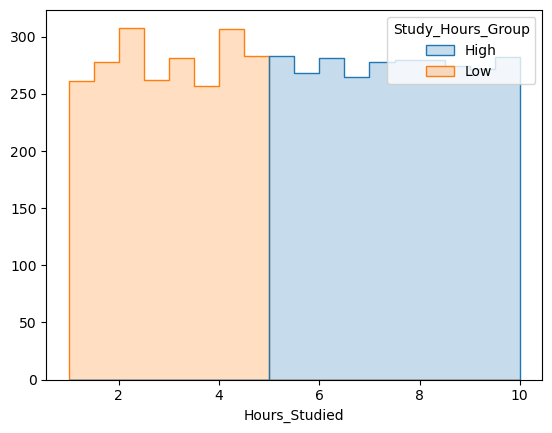

In [87]:
#  Using Seaborn to create a histogram plot of the 'Hours_Studied' variable in your DataFrame df.
sns.histplot(data=df, x='Hours_Studied', hue='Study_Hours_Group', element='step', common_norm=False)
plt.xlabel('Hours_Studied')
plt.ylabel('')
plt.show()

From the histogram plot, we can observe that above the ~5-hour threshold, the 'Study_Hours_Group' tends to be high. This suggests that the 'Study_Hours_Group' variable may not have been a dependent variable after all, which  indicates that the number of study hours may have a significant influence on the categorization into study hour groups.

This interpretation highlights the relationship between the number of study hours and the 'Study_Hours_Group' variable, suggesting that the 'Study_Hours_Group' variable appears to be influenced by the number of study hours.

## Prediction of Average Marks


In [59]:
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,71.67,0,0
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,73.67,2,1
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,65.33,2,2
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,79.67,2,4
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,75.33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low,79.00,1,4
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low,79.00,2,2
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low,81.00,2,1
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High,84.00,0,4


In [60]:
# Creating a new DataFrame called regression_data_frame by making a copy of the original DataFrame df and then dropping certain columns.
regression_data_frame = df.copy()
regression_data_frame.drop(['Name','Age','IQ'], axis=1, inplace=True)
regression_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,Male,8.140821,87,43,85,True,High,71.67,0,0
1,Female,9.825626,86,81,54,False,High,73.67,2,1
2,Male,8.835372,87,52,57,True,High,65.33,2,2
3,Male,2.482483,70,86,83,False,Low,79.67,2,4
4,Female,4.419793,95,48,83,True,Low,75.33,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,Female,3.653474,93,59,85,True,Low,79.00,1,4
4996,Female,1.096493,68,70,99,True,Low,79.00,2,2
4997,Male,4.156770,76,96,71,False,Low,81.00,2,1
4998,Female,6.788548,81,98,73,False,High,84.00,0,4


In [61]:
# Using Scikit-Learn's LabelEncoder to encode categorical variables in the regression_data_frame DataFrame into numerical values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
regression_data_frame['Gender'] = le.fit_transform(regression_data_frame['Gender'])
regression_data_frame['Study_Hours_Group'] = le.fit_transform(regression_data_frame['Study_Hours_Group'])
regression_data_frame['Has_Part_Time_Job'] = le.fit_transform(regression_data_frame['Has_Part_Time_Job'])
regression_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,1,8.140821,87,43,85,1,0,71.67,0,0
1,0,9.825626,86,81,54,0,0,73.67,2,1
2,1,8.835372,87,52,57,1,0,65.33,2,2
3,1,2.482483,70,86,83,0,1,79.67,2,4
4,0,4.419793,95,48,83,1,1,75.33,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,0,3.653474,93,59,85,1,1,79.00,1,4
4996,0,1.096493,68,70,99,1,1,79.00,2,2
4997,1,4.156770,76,96,71,0,1,81.00,2,1
4998,0,6.788548,81,98,73,0,0,84.00,0,4


In [62]:
# Dropping specific columns
regression_data_frame.drop(['Math_Marks','Physics_Marks','Chemistry_Marks'], axis=1, inplace=True)
regression_data_frame

,Gender,Hours_Studied,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,1,8.140821,1,0,71.67,0,0
1,0,9.825626,0,0,73.67,2,1
2,1,8.835372,1,0,65.33,2,2
3,1,2.482483,0,1,79.67,2,4
4,0,4.419793,1,1,75.33,1,0
...,...,...,...,...,...,...,...
4995,0,3.653474,1,1,79.00,1,4
4996,0,1.096493,1,1,79.00,2,2
4997,1,4.156770,0,1,81.00,2,1
4998,0,6.788548,0,0,84.00,0,4


In [63]:
# Average_Marks column from the regression_data_frame DataFrame is converted into  a NumPy array
y = regression_data_frame['Average_Marks'].to_numpy()
y

array([71.67, 73.67, 65.33, ..., 81.  , 84.  , 65.33])

In [64]:
# Dropping specific columns
regression_data_frame.drop(['Average_Marks'], axis=1, inplace=True)
regression_data_frame


,Gender,Hours_Studied,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,1,8.140821,1,0,0,0
1,0,9.825626,0,0,2,1
2,1,8.835372,1,0,2,2
3,1,2.482483,0,1,2,4
4,0,4.419793,1,1,1,0
...,...,...,...,...,...,...
4995,0,3.653474,1,1,1,4
4996,0,1.096493,1,1,2,2
4997,1,4.156770,0,1,2,1
4998,0,6.788548,0,0,0,4


In [65]:
#not considering gender as we previously saw it had no effect on study hours group
X = modelling_data_frame.iloc[:, 1: ].values
X.shape

(5000, 4)

In [92]:
X

array([[ 8.14082056e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.29306370e-03],
       [ 9.82562647e+00,  0.00000000e+00,  2.00000000e+00,
         1.00000000e+00, -9.96387798e-04],
       [ 8.83537190e+00,  1.00000000e+00,  2.00000000e+00,
         2.00000000e+00, -7.76238405e-04],
       ...,
       [ 4.15676969e+00,  0.00000000e+00,  2.00000000e+00,
         1.00000000e+00, -7.04597528e-04],
       [ 6.78854842e+00,  0.00000000e+00,  0.00000000e+00,
         4.00000000e+00, -9.67589210e-04],
       [ 1.62711148e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00, -9.14214770e-04]])

In [90]:
y

array([71.67, 73.67, 65.33, ..., 81.  , 84.  , 65.33])

In [68]:
# using Scikit-Learn's train_test_split function to split your feature matrix X and target variable y into training and testing sets. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
# Using Scikit-Learn's StandardScaler to perform feature scaling on your training and testing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
# Using the CatBoostRegressor from the CatBoost library to train a regression model on the preprocessed data.
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)

Learning rate set to 0.050969
0:	learn: 10.1469906	total: 3.16ms	remaining: 3.16s
1:	learn: 10.1419450	total: 5.99ms	remaining: 2.99s
2:	learn: 10.1412633	total: 7.67ms	remaining: 2.55s
3:	learn: 10.1376876	total: 12.1ms	remaining: 3s
4:	learn: 10.1319021	total: 14.9ms	remaining: 2.96s
5:	learn: 10.1269697	total: 17.4ms	remaining: 2.88s
6:	learn: 10.1220853	total: 20.3ms	remaining: 2.87s
7:	learn: 10.1197544	total: 23.1ms	remaining: 2.87s
8:	learn: 10.1155123	total: 28.1ms	remaining: 3.09s
9:	learn: 10.1122837	total: 32ms	remaining: 3.17s
10:	learn: 10.1083799	total: 35.4ms	remaining: 3.18s
11:	learn: 10.1073269	total: 37.1ms	remaining: 3.05s
12:	learn: 10.1066043	total: 39.5ms	remaining: 3s
13:	learn: 10.1039259	total: 43.4ms	remaining: 3.05s
14:	learn: 10.1009804	total: 46.6ms	remaining: 3.06s
15:	learn: 10.0997005	total: 49.2ms	remaining: 3.02s
16:	learn: 10.0978785	total: 52.2ms	remaining: 3.02s
17:	learn: 10.0940968	total: 55.3ms	remaining: 3.02s
18:	learn: 10.0910001	total: 58.7m

202:	learn: 9.7912704	total: 577ms	remaining: 2.27s
203:	learn: 9.7901868	total: 581ms	remaining: 2.27s
204:	learn: 9.7887011	total: 584ms	remaining: 2.26s
205:	learn: 9.7866431	total: 586ms	remaining: 2.26s
206:	learn: 9.7848354	total: 589ms	remaining: 2.26s
207:	learn: 9.7827126	total: 592ms	remaining: 2.25s
208:	learn: 9.7809179	total: 595ms	remaining: 2.25s
209:	learn: 9.7793081	total: 598ms	remaining: 2.25s
210:	learn: 9.7770390	total: 602ms	remaining: 2.25s
211:	learn: 9.7752446	total: 604ms	remaining: 2.25s
212:	learn: 9.7733016	total: 607ms	remaining: 2.24s
213:	learn: 9.7713757	total: 611ms	remaining: 2.24s
214:	learn: 9.7702477	total: 614ms	remaining: 2.24s
215:	learn: 9.7686901	total: 617ms	remaining: 2.24s
216:	learn: 9.7659776	total: 620ms	remaining: 2.24s
217:	learn: 9.7640774	total: 623ms	remaining: 2.23s
218:	learn: 9.7619249	total: 627ms	remaining: 2.23s
219:	learn: 9.7592404	total: 630ms	remaining: 2.23s
220:	learn: 9.7579663	total: 632ms	remaining: 2.23s
221:	learn: 

391:	learn: 9.5004036	total: 1.15s	remaining: 1.78s
392:	learn: 9.4993121	total: 1.15s	remaining: 1.78s
393:	learn: 9.4981999	total: 1.15s	remaining: 1.77s
394:	learn: 9.4965991	total: 1.16s	remaining: 1.77s
395:	learn: 9.4957904	total: 1.16s	remaining: 1.77s
396:	learn: 9.4942449	total: 1.16s	remaining: 1.76s
397:	learn: 9.4926002	total: 1.16s	remaining: 1.76s
398:	learn: 9.4909621	total: 1.17s	remaining: 1.76s
399:	learn: 9.4903828	total: 1.17s	remaining: 1.75s
400:	learn: 9.4895004	total: 1.17s	remaining: 1.75s
401:	learn: 9.4875059	total: 1.18s	remaining: 1.75s
402:	learn: 9.4863972	total: 1.18s	remaining: 1.75s
403:	learn: 9.4844846	total: 1.18s	remaining: 1.74s
404:	learn: 9.4833032	total: 1.18s	remaining: 1.74s
405:	learn: 9.4821972	total: 1.19s	remaining: 1.74s
406:	learn: 9.4811378	total: 1.19s	remaining: 1.73s
407:	learn: 9.4788932	total: 1.19s	remaining: 1.73s
408:	learn: 9.4774028	total: 1.2s	remaining: 1.73s
409:	learn: 9.4761852	total: 1.2s	remaining: 1.72s
410:	learn: 9.

609:	learn: 9.2416454	total: 1.73s	remaining: 1.1s
610:	learn: 9.2398265	total: 1.73s	remaining: 1.1s
611:	learn: 9.2375656	total: 1.73s	remaining: 1.1s
612:	learn: 9.2360929	total: 1.74s	remaining: 1.1s
613:	learn: 9.2343768	total: 1.74s	remaining: 1.09s
614:	learn: 9.2332833	total: 1.74s	remaining: 1.09s
615:	learn: 9.2326084	total: 1.75s	remaining: 1.09s
616:	learn: 9.2314667	total: 1.75s	remaining: 1.08s
617:	learn: 9.2306765	total: 1.75s	remaining: 1.08s
618:	learn: 9.2291237	total: 1.75s	remaining: 1.08s
619:	learn: 9.2283576	total: 1.76s	remaining: 1.08s
620:	learn: 9.2270522	total: 1.76s	remaining: 1.07s
621:	learn: 9.2262302	total: 1.76s	remaining: 1.07s
622:	learn: 9.2252983	total: 1.77s	remaining: 1.07s
623:	learn: 9.2235773	total: 1.77s	remaining: 1.07s
624:	learn: 9.2228505	total: 1.77s	remaining: 1.06s
625:	learn: 9.2217104	total: 1.77s	remaining: 1.06s
626:	learn: 9.2208482	total: 1.78s	remaining: 1.06s
627:	learn: 9.2201982	total: 1.78s	remaining: 1.05s
628:	learn: 9.21

824:	learn: 9.0275937	total: 2.31s	remaining: 489ms
825:	learn: 9.0270153	total: 2.31s	remaining: 486ms
826:	learn: 9.0264890	total: 2.31s	remaining: 484ms
827:	learn: 9.0260372	total: 2.31s	remaining: 481ms
828:	learn: 9.0256512	total: 2.32s	remaining: 478ms
829:	learn: 9.0245817	total: 2.32s	remaining: 475ms
830:	learn: 9.0237878	total: 2.32s	remaining: 472ms
831:	learn: 9.0233007	total: 2.33s	remaining: 470ms
832:	learn: 9.0229765	total: 2.33s	remaining: 467ms
833:	learn: 9.0222847	total: 2.33s	remaining: 464ms
834:	learn: 9.0215305	total: 2.33s	remaining: 461ms
835:	learn: 9.0201413	total: 2.33s	remaining: 458ms
836:	learn: 9.0185936	total: 2.34s	remaining: 455ms
837:	learn: 9.0180221	total: 2.34s	remaining: 452ms
838:	learn: 9.0170107	total: 2.34s	remaining: 450ms
839:	learn: 9.0158420	total: 2.35s	remaining: 447ms
840:	learn: 9.0147790	total: 2.35s	remaining: 444ms
841:	learn: 9.0138986	total: 2.35s	remaining: 441ms
842:	learn: 9.0129415	total: 2.35s	remaining: 438ms
843:	learn: 

In [72]:
# Using the trained CatBoostRegressor model to make predictions on the testing data X_test
y_pred = regressor.predict(X_test)
y_pred[:10] # selecting the first 10 predictions in array

array([69.99937429, 68.66941269, 69.40847523, 61.49272276, 66.85845422,
       71.94213021, 69.65874231, 72.00440712, 72.49843006, 69.75302738])

The predictions of the average_marks made by  CatBoostRegressor model for each observation are around 70, which is similar to the mean of each subject. This observation suggests that the model's predictions are close to the mean value, indicating that the model might not be capturing significant variations in the data.

In [73]:
df.describe()

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Average_Marks,Age_Band,IQ_Band
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800,69.975258,1.707400,1.7162
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913,10.138057,1.489506,1.4719
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000,41.670000,0.000000,0.0000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000,63.000000,0.000000,0.0000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000,70.000000,1.000000,1.0000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000,77.330000,2.000000,2.0000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000,98.330000,4.000000,4.0000


In [74]:
# calculating the mean absolute error  to assess the performance of your regression model.
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, y_pred)
print(round(error,3))

8.478


We got a mean_absolute_error of 8.478, which means the regression model predicted values were off by around 8.478 marks when compared to the actual target values. The model's predictions, on average, had an absolute difference of approximately 8.478 marks from the true values.